In [2]:
import define_transformations_afolu as dta
import define_transformations_circular_economy as dtc
import define_transformations_energy as dte
import define_transformations_ippu as dti
import define_transformations_integrated as dtr

import os, os.path
import numpy as np
import pandas as pd
#from model_attributes import *
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_electricity as ml
import model_energy as me
import model_socioeconomic as se
import setup_analysis as sa
import sisepuede_data_api as api
import sisepuede_models as sm
import support_classes as sc
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
from typing import Union
import inspect
import ingestion as ing
import logging
from sisepuede_file_structure import *
import transformations_base_afolu as tba
import transformations_base_circular_economy as tbc
import transformations_base_energy as tbe
import transformations_base_general as tbg
import transformations_base_ippu as tbi


importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(tbc)
importlib.reload(tbe)


import sisepuede as ssp


def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_build_sisepuede_transformations.log"))


/Users/jsyme/anaconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{CH}_4 Stationary Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{CO}_2 Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning pas

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{CH}_4 Stationary Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{CO}_2 Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{N}_2\text{O} Stationary Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


<Logger __main__ (DEBUG)>

<AxesSubplot: >

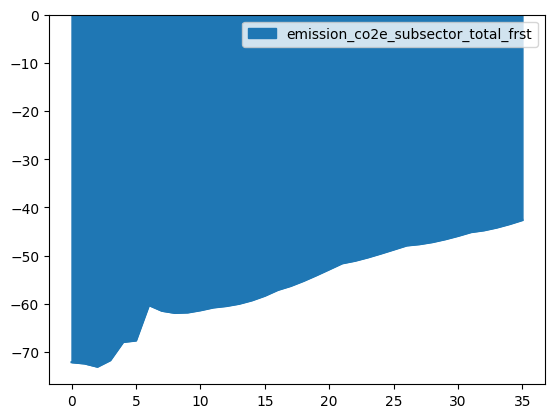

In [9]:
df = pd.read_csv("/Users/jsyme/Documents/Personal Files/Other Work/WB_SISEPUEDE/india/lulit_hypothetical_cge_run_20240718/MODEL_OUTPUT.csv")


subsecs = ["agrc", "lvst", "lsmm", "soil", "lndu", "frst"]
subsecs = ["frst"]
flds = [
    x for x in df.columns if "emission_co2e_subsector_total" in x 
    and any([y in x for y in subsecs])
]
 
df[flds].plot.area()
   
   

# Modify an existing dataset stored in templates

In [2]:
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = True,
    regions = ["india"],
    try_exogenous_xl_types_in_variable_specification = True,
)

/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Successfully initialized Analysis ID 'sisepuede_run_2024-07-14T22:50:52.856994'.
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Verification of SISEPUEDE directory structure completed successfully with 0 errors..
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Properties for variable :math:\text{CH}_4 Stationary Combustion Emission Factor successfully set with 0 errors...
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2244: UserWarning: Warning passed from optional_log: Propertie

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-07-14 22:50:53,898 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-07-14 22:50:53,898 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-07-14 22:50:53,899 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-07-14 22:50:53,899 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-07-14 22:50:53,900 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-07-14 22:50:53,900 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-07-14 22:50:53,901 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS. Initializing index fields.
2024-07-14 22:50:53,901 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS
2024-07-14 22:50:53,902 - WARNING - No index fields found in ATTRIBUTE_PRIMARY. Initializing index fields.
2024-07-14 22:50:53,903 - 

RuntimeError: Error initializing BaseInputDatabase -- 'BaseInputDatabase' object has no attribute 'baseline_strategy'

In [16]:
fields_ext = ["region", "time_period"]#["iso_alpha_3", "year"]

for modvar in ["Population", "GDP"]:
    
    fields_cur = sa.model_attributes.build_variable_fields(modvar,)
    fields_cur = fields_ext + fields_cur
    
    df_historical_cur = df_historical[fields_cur]
    
df_historical_cur

,region,time_period,gdp_mmm_usd
0,louisiana,0,232.458
1,louisiana,1,228.253
2,louisiana,2,231.373
3,louisiana,3,237.372
4,louisiana,4,240.475
5,louisiana,5,244.347
6,louisiana,6,247.796
7,louisiana,7,251.416
8,louisiana,8,255.324
9,louisiana,9,259.509


# Get some data pipeline components

In [487]:
#rasterio.open(fp_out)
import sys
sys.path.append("/Users/jsyme/Documents/Projects/git_jbus/sisepuede_data_pipeline/")


# import key modules
import lib.data_objects as do
import lib.process_utilities as pu
import lib.sisepuede_data_constructs as dc
import lib.data_construction_utilities as util


# get constructs and local repo
construct = dc.SISEPUEDEDataConstructs()
repo = pu.Repository(
    {
        "local": {
            "path": "/Users/jsyme/SISEPUEDE_DATA_REPOSITORY"
        }
    }
)

matt = construct.sisepuede_file_struct.model_attributes


warnings.filterwarnings("ignore")
fp_config = "/Users/jsyme/Documents/Personal Files/Other Work/Louisiana/transitions/config.yaml"



MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


## 

# Short code to convert US Tiger Line shapefiles to tiff

In [2]:
import geopandas as gpd
import rasterio
from rasterio import features


fp = "/Users/jsyme/Documents/General Use Data/Geographic/tl_2023_us_state/tl_2023_us_state.shp"

gpd_states = gpd.read_file(fp).to_crs("EPSG:4326")
gpd_states["STATEFP_INT"] = gpd_states["STATEFP"].astype(int)




#
# following steps from:
#   https://gis.stackexchange.com/questions/151339/rasterize-a-shapefile-with-geopandas-or-fiona-python
#
# open ArcGIS World Boundaries
fp_mask = "/Users/jsyme/SISEPUEDE_DATA_REPOSITORY/geo/arcgis/RasterMask_L0_1km.tif"
with rasterio.open(fp_mask) as mask:
    meta = mask.meta.copy()
    
meta.update(compress='lzw')



# set output 
fp_states_raster = fp.replace(".shp", "arcrastermask1km.tif")

if not os.path.exists(fp_states_raster):
    with rasterio.open(fp_states_raster, 'w+', **meta) as out:

        out_arr = out.read(1)

        # this is where we create a generator of geom, value pairs to use in rasterizing
        shapes = (
            (geom, value) 
            for geom, value in zip(gpd_states["geometry"], gpd_states["STATEFP_INT"])
        )

        burned = features.rasterize(
            shapes = shapes, 
            fill = 0, 
            out = out_arr, 
            transform = out.transform,
        )

        out.write_band(1, burned)

    

    
# resampling to match fp_mask
fp = "/Users/jsyme/Downloads/nlcd_2016_land_cover_l48_20210604/nlcd_2016_land_cover_l48_20210604.img"
raster = rx.open_rasterio(fp)


resamp = rx.raster_array.rasterio.enums.Resampling
with rx.open_rasterio(fp_mask) as mask:    
    raster_nc = raster.rio.reproject_match(
        mask,
        resampling = resamp.mode,
    )

fp_nc_state_luc = "/Users/jsyme/SISEPUEDE_DATA_REPOSITORY/geo/nlcd_2016_land_cover_l48_20210604/nlcd_2016_land_cover_l48_20210604_reproj.nc"
raster_nc.to_netcdf(fp_nc_state_luc)





    
    


##  Work on building land use prevalence

In [99]:
raster_nc = rx.open_rasterio(fp_nc_state_luc)
raster_states = rx.open_rasterio(fp_states_raster)


# set state
state_nm = "Louisiana"
dict_state_info = (
    gpd_states[
        gpd_states["NAME"].isin(["Louisiana"])
    ]
    .iloc[0]
    .to_dict()
)

fips = int(dict_state_info.get("STATEFP"))


# read a crosswalk from SISEPUEDE
field_nlcd_code = "nlcd_luc_code"
df_cw_nlcd = pd.read_csv(
    os.path.join(
        construct.sisepuede_file_struct.dir_ref,
        "data_crosswalks",
        "usgs_nlcd_land_cover_categories.csv"
    )
)

# some lndu attributes
attr_lndu = matt.get_attribute_table(matt.subsec_name_lndu)
pycat_lndu = matt.get_subsector_attribute(matt.subsec_name_lndu, "pycategory_primary_element")

# check categories
undef_cats = set(df_cw_nlcd[pycat_lndu]) - set(attr_lndu.key_values)
if len(undef_cats) > 0:
    raise RuntimeError(f"Error in reading NLCD cw: undef {pycat_lndu} categories {undef_cats} found")
    
# get some special categories
code_pasture = int(
    df_cw_nlcd[
        df_cw_nlcd["notes"].isin(["pasture"])
    ][
        field_nlcd_code
    ]
    .iloc[0]
)

    
    

In [274]:
#
# GET GRID INDICES
#

# indices where rasters are FIPS
ind_extract = np.where(raster_states == fips)

grid_vals = np.extract(
    raster_states[0] == fips,
    raster_nc[0].as_numpy()
)
grid_vals = np.array([x for x in grid_vals if x in df_cw_nlcd[field_nlcd_code].unique()])


# get all grid values

#
#
all_grid_values = np.unique(grid_vals)

dict_counts = {}
for gv in all_grid_values:
    counts = len(np.where(grid_vals == gv)[0])
    dict_counts.update({gv: counts})
dict_props = dict((k, v/len(grid_vals)) for k, v in dict_counts.items())



In [295]:
model_afolu = mafl.AFOLU(matt)

# get variables
modvar_lndu_init_frac = matt.get_variable(model_afolu.modvar_lndu_initial_frac)
modvar_lndu_pasture_frac = matt.get_variable(model_afolu.modvar_lndu_frac_grassland_that_is_pasture)


#
#   AGGREGATE 
#

df_fracs = pd.DataFrame(
    dict_props.items(),
    columns = [field_nlcd_code, "frac"]
)

df_fracs = pd.merge(
    df_fracs, 
    df_cw_nlcd[[field_nlcd_code, pycat_lndu]]
)

df_agg = sf.simple_df_agg(
    df_fracs[[pycat_lndu, "frac"]],
    [pycat_lndu],
    {
        pycat_lndu: "first",
        "frac": "sum",
    }
)

# add any missing categories
cats_missing = list(set(attr_lndu.key_values) - set(df_agg[pycat_lndu]))
rows_new = []
for cat in cats_missing:
    rows_new.append([cat, 0.0])

if len(rows_new) > 0:
    rows_new = pd.DataFrame(rows_new, columns = [pycat_lndu, "frac"])
    df_agg = pd.concat(
        [
            df_agg,
            rows_new[df_agg.columns]
        ]
    )


#
# 
#

dict_cat_to_field = matt.get_category_replacement_field_dict(modvar_lndu_init_frac)
df_agg[pycat_lndu].replace(
    dict_cat_to_field,
    inplace = True,
)
# set to 2015 baseline
df_agg[construct.time_periods.field_year] = 2015
df_init_frac = (
    sf.pivot_df_clean(
        df_agg,
        [pycat_lndu],
        ["frac"]
    )
    .drop(columns = [construct.time_periods.field_year])
)


df_years = (
    construct.time_periods.get_time_period_df(
        include_year = True,
    )
    .drop(construct.time_periods.field_time_period, axis = 1)
)





fld_grss = dict_cat_to_field.get(model_afolu.cat_lndu_grass)
fld_prim = dict_cat_to_field.get(model_afolu.cat_lndu_fstp)
fld_scnd = dict_cat_to_field.get(model_afolu.cat_lndu_fsts)



##
##   MAKE SOME MODIFICATIONS
##

vec_prim_new = df_init_frac[fld_prim].to_numpy()
vec_scnd_new = df_init_frac[fld_scnd].to_numpy()
vec_shift = vec_prim_new*frac_secondary


# shift a small amount of primary to secondary

frac_secondary = 0.05

vec_scnd_new += vec_shift
vec_prim_new -= vec_shift
df_init_frac[fld_prim] = vec_prim_new
df_init_frac[fld_scnd] = vec_scnd_new

# set the pasture fraction
frac_pasture = dict_props.get(code_pasture) / df_init_frac[fld_grss].to_numpy()
frac_pasture = frac_pasture[0]



# add to years
df_init_frac = sf.explode_merge(
    df_init_frac,
    df_years,
)



# build pasture fraction
df_pasture_frac = (
    df_init_frac[
        [
            construct.time_periods.field_year,
            fld_grss,
        ]
    ]
    .copy()
    .rename(
        columns = {
            fld_grss: modvar_lndu_pasture_frac.fields[0]
        }
    )
)

df_pasture_frac[modvar_lndu_pasture_frac.fields[0]] = frac_pasture



# data to write



In [323]:
#
#   WRITE EVERYTHING TO OUTPUTS
#

# write outputs
dir_out = "/Users/jsyme/Documents/Personal Files/Other Work/Louisiana/temp_data"
if not os.path.exists(dir_out):
    os.makedirs(dir_out, exist_ok = True)
    
# output name for initial fraction
fn_out_init_frac = construct.get_output_db_table_name(
    modvar_lndu_init_frac,
    "historical",
)

# output name for initial fraction
fn_out_frac_pasture = construct.get_output_db_table_name(
    modvar_lndu_pasture_frac,
    "historical",
)


#
# NOTE: REQUIRES A TEMPORARY REGION
#  Louisiana	louisiana	LOU	LA	22	322	-999	None	None	None	None	None	0	0
#
#

regions_ok = "LOU" in construct.regions.all_isos
if not regions_ok:
    raise RuntimeError(f"Error, region LOU not found in regions. Make sure the attribute table for regions has the row. Check the temp data directory for it. ")

df_init_frac[construct.regions.field_iso] = "LOU"
df_pasture_frac[construct.regions.field_iso] = "LOU"


# write
df_init_frac.to_csv(
    os.path.join(dir_out, f"{fn_out_init_frac}.csv", ),
    index = None,
    encoding = "UTF-8",
)


# write
df_pasture_frac.to_csv(
    os.path.join(dir_out, f"{fn_out_frac_pasture}.csv", ),
    index = None,
    encoding = "UTF-8",
)




# Pull data from existing repo

In [349]:
## TEMP: get area from repo
dir_repo_data = "/Users/jsyme/Documents/Projects/git_jbus/louisiana_data_framework/sisepuede/data"
repo_old = api.SISEPUEDEBatchDataRepository(
    dir_repo_data,
    matt,
)

modvars = [
    model_afolu.model_socioeconomic.modvar_gnrl_area
]

df_sectored_repo_0 = repo_old.read(modvars, add_time_periods = False)
df_sectored_repo_0["iso_code3"] = "LOU"


# output name for area
fn_out_frac_pasture = construct.get_output_db_table_name(
    modvars[0],
    "historical",
)

df_sectored_repo_0.to_csv(
    os.path.join(dir_out, f"{fn_out_frac_pasture}.csv"),
    index = None,
    encoding = "UTF-8"
)

In [345]:
os.path.join(dir_out, f"{fn_out_frac_pasture}.csv")

'/Users/jsyme/Documents/Personal Files/Other Work/Louisiana/temp_data/AREA_OF_REGION_HISTORICAL.csv'

In [353]:
importlib.reload(pu)
reader = pu.InputsReader(
    fp_config,
    sisepuede_constructs = construct,
    repository = repo,
    stop_on_error = False,
)







In [352]:
#reader.initial_land_use_area_proportion
import afolu.geo.modvar_land_use_transition_probabilities as probs

df_probs = probs.main(
    inputs_reader = reader,
    return_behavior = "data_only",
    sisepuede_constructs = construct,
)


AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
df_probs = probs.build_base_copernicus_transition_estimates(
    reader,
    matt,
    construct.regions,
    construct.time_periods,
)


# output name for area
fn_out_pij = construct.get_output_db_table_name(
    model_afolu.modvar_lndu_prob_transition,
    "historical",
)

(
    df_probs[
        df_probs["iso_alpha_3"].isin(["LOU"])
    ]
    .reset_index(drop = True)
    .to_csv(
        os.path.join(dir_out, f"{fn_out_pij}.csv"),
        index = None,
        encoding = "UTF-8"
    )
)

In [369]:
# build dataset to write
df_to_write = pd.merge(
    df_init_frac,
    df_pasture_frac,
)

df_to_write = pd.merge(
    df_to_write,
    df_probs,
)

# 
df_to_write[construct.regions.field_iso] = "LA"
df_to_write.rename(
    columns = {
        construct.regions.field_iso: repo_old.field_repo_iso,
    },
    inplace = True,
)


In [381]:
# write these data to the repo
repo_old.write_from_df(
    df_to_write,
    years_historical = list(
        range(
            df_to_write[construct.time_periods.field_year].min(),
            2020,
        )
    )
)

2015

# Build Livestock pop

In [468]:
# set some fields
field_population = "population"
field_year = construct.time_periods.field_year

# some model attributes objs
attr_lvst = matt.get_attribute_table(matt.subsec_name_lvst)
pycat_lvst = matt.get_subsector_attribute(matt.subsec_name_lvst, "pycategory_primary_element")
modvar_lvst_pop_init = matt.get_variable(model_afolu.modvar_lvst_pop_init)
dict_cat_to_field_lvpop = matt.get_category_replacement_field_dict(modvar_lvst_pop_init)

# pull from PDF inventory tables (manually added to inputs)
df_inventory = repo.read_file("USDA_NASS/AgCensus/Louisiana/2022_ag_census_la.csv")
df_inventory = df_inventory[0]
df_inventory = df_inventory[[pycat_lvst, field_year, field_population]]





# add some rows just in case
cats_missing = [x for x in attr_lvst.key_values if x not in df_inventory[pycat_lvst].unique()]
if len(cats_missing) > 0:
    rows_missing = []
    yr = df_inventory[field_year].min()
    
    for cat in cats_missing:
        rows_missing.append(
            [
                cat,
                yr,
                0
            ]
        )
        
    rows_missing = pd.DataFrame(
        rows_missing,
        columns = [pycat_lvst, field_year, field_population]
    )
    
    df_inventory = pd.concat(
        [
            df_inventory, 
            rows_missing[df_inventory.columns]
        ],
        axis = 0
    )
    
    
# aggregate, replace, and pivot
df_inventory_agg = sf.simple_df_agg(
    df_inventory,
    [pycat_lvst, field_year],
    {
        pycat_lvst: "first",
        field_year: "first",
        field_population: "sum",
    }
)

df_inventory_agg[pycat_lvst].replace(
    dict_cat_to_field_lvpop,
    inplace = True,
)

df_inventory_agg = sf.pivot_df_clean(
    df_inventory_agg,
    [pycat_lvst],
    [field_population]
)

# next, merge into years and interpolate/fill
df_inventory_agg = (
    pd.merge(
        construct.time_periods.get_time_period_df(
            include_year = True,
        )
        .drop(columns = construct.time_periods.field_time_period),
        df_inventory_agg,
        how = "left",
    )
    .interpolate()
    .interpolate(method = "bfill")
)

for field in df_inventory_agg.columns:
    df_inventory_agg[field] = df_inventory_agg[field].astype(int)

# add a region and write to temp
df_inventory_agg[construct.regions.field_iso] = "LOU"



##  WRITE

# output name for area
fn_out_lvst_pop = construct.get_output_db_table_name(
    modvar_lvst_pop_init,
    "historical",
)

df_inventory_agg.to_csv(
    os.path.join(dir_out, f"{fn_out_lvst_pop}.csv"),
    index = None,
    encoding = "UTF-8"
)


# add to repo (old format)
df_inventory_agg[construct.regions.field_iso] = "LA"
# write these data to the repo
repo_old.write_from_df(
    df_inventory_agg.rename(
        columns = {
            construct.regions.field_iso: repo_old.field_repo_iso
        }
    ),
    years_historical = list(
        range(
            df_inventory_agg[field_year].min(),
            df_inventory[field_year].max() + 1,
        )
    )
)

In [704]:
modvars_read = [
    "AFOLU",
    "Circular Economy",
    "Energy",
    "IPPU",
    "Socioeconomic"
]

df_read = repo_old.read(
    modvars_read,
    add_time_periods = True,
)


In [648]:
"""df_read[
    df_read[repo_old.field_repo_iso].isin(["LA"])
][
    ["year"] + [x for x in df_read.columns if "prodinit" in x]
].dropna()""";

In [ ]:
# Get a LA baseline dataset

In [705]:
df_la = (
    df_read[
        df_read[repo_old.field_repo_iso].isin(["LA"])
        & df_read[construct.time_periods.field_time_period].isin(construct.time_periods.all_time_periods)
    ]
    .reset_index(drop = True)
)

fields_na = [
    x for x in df_la.columns
    if len(df_la[x].dropna()) == 0
]

df_la.drop(columns = fields_na, inplace = True)

# get usa vals?
df_usa = (
    df_read[
        df_read[repo_old.field_repo_iso].isin(["USA"])
        & df_read[construct.time_periods.field_time_period].isin(construct.time_periods.all_time_periods)
    ]
    .reset_index(drop = True)
    .drop(columns = [repo_old.field_repo_iso, field_year])
)

df_la_adj = pd.merge(
    df_la,
    df_usa[[construct.time_periods.field_time_period] + fields_na],
)



In [572]:
# initialize a SISEPUEDE object to pull some data from
import sisepuede as ssp
importlib.reload(ssp)

sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    initialize_as_dummy = False,
    regions = ["brazil"],
)


MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-06-03 13:26:32,755 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-06-03 13:26:32,755 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-06-03 13:26:32,762 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-06-03 13:26:32,762 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-06-03 13:26:32,763 - INFO - 	Setting export engine to 'sqlite'.
2024-06-03 13:26:32,763 - INFO - 	Setting export engine to 'sqlite'.
2024-06-03 13:26:32,797 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-06-03 13:26:32,797 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-06-03 13:26:32,798 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-06-03 13:26:32,798 - INFO - Succes

In [706]:
df_inputs_base = sisepuede.generate_scenario_database_from_primary_key(0).get("brazil").copy()

# clean it
df_inputs_base.drop(
    columns = [sisepuede.key_primary]
)
df_inputs_base[sisepuede.key_region] = "louisiana"



# overwrite info from repo
df_inputs_base_la = sf.match_df_to_target_df(
    df_inputs_base,
    df_la_adj
    .drop(
        columns = [
            repo_old.field_repo_iso,
            construct.time_periods.field_year
        ]
    ),
    [
        construct.time_periods.field_time_period
    ],
    overwrite_only = False,
)



##
#   DO SOME MANUAL OVERWRITES
##

m_elec = sisepuede.models.model_electricity

# turn off a max capacity and max capacity of investment
modvar_tmc = matt.get_variable(m_elec.modvar_entc_nemomod_total_annual_max_capacity)
df_inputs_base_la[modvar_tmc.fields] = -999

modvar_tmci = matt.get_variable(m_elec.modvar_entc_nemomod_total_annual_max_capacity_investment)
df_inputs_base_la[modvar_tmci.fields] = -999


# Update NEMO reference files for specified demand profile and capacity factor
- Temporary solution 2024/07/08: add louisiana region to data using united_states


In [22]:
os.listdir(sa.dir_ref_nemo)

field_region = "r"#sa.model_attributes.dim_region
region = "louisiana"
region_analog = "united_states_of_america"

for fn in ["CapacityFactor", "SpecifiedDemandProfile"]:
    fn_read = f"{fn}.csv"
    fp_read = os.path.join(sa.dir_ref_nemo, fn_read)
    
    df = pd.read_csv(fp_read)
    
    if region in df[field_region].unique():
        print(f"Region '{region}' found in file {fn}. Skipping...")
        continue
        
    
    if region_analog not in df[field_region].unique():
        print(f"Region '{region_analog}' not found in file {fn}. Skipping...")
        continue
    
    df_cur = (
        df[
            df[field_region].isin([region_analog])
        ]
        .copy()
    )
    
    df_cur[field_region] = region
    
    df_out = (
        pd.concat(
            [df, df_cur],
            axis = 0,
        )
    )
    
    
    if False:
        df_out.to_csv(
            fp_read,
            index = None,
            encoding = "UTF-8"
        )
    
    

Region 'louisiana' found in file CapacityFactor. Skipping...
Region 'louisiana' found in file SpecifiedDemandProfile. Skipping...


In [707]:
"""#df_inputs_base["population_gnrl_urban"].tail()
matt.extract_model_variable(
    df_inputs_base2,
    modvar_lvst_pop_init
)""";
[
    x for x in dir(sisepuede.models.model_electricity)#energy)
    if x.startswith("modvar_entc")
]


['modvar_entc_ef_scalar_ch4',
 'modvar_entc_ef_scalar_co2',
 'modvar_entc_ef_scalar_n2o',
 'modvar_entc_efficiency_factor_technology',
 'modvar_entc_fuelprod_emissions_activity_ratio_ch4',
 'modvar_entc_fuelprod_emissions_activity_ratio_co2',
 'modvar_entc_fuelprod_emissions_activity_ratio_n2o',
 'modvar_entc_fuelprod_input_activity_ratio_coal_deposits',
 'modvar_entc_fuelprod_input_activity_ratio_crude',
 'modvar_entc_fuelprod_input_activity_ratio_diesel',
 'modvar_entc_fuelprod_input_activity_ratio_electricity',
 'modvar_entc_fuelprod_input_activity_ratio_gasoline',
 'modvar_entc_fuelprod_input_activity_ratio_natural_gas',
 'modvar_entc_fuelprod_input_activity_ratio_natural_gas_unprocessed',
 'modvar_entc_fuelprod_input_activity_ratio_oil',
 'modvar_entc_fuelprod_output_activity_ratio_coal',
 'modvar_entc_fuelprod_output_activity_ratio_diesel',
 'modvar_entc_fuelprod_output_activity_ratio_gasoline',
 'modvar_entc_fuelprod_output_activity_ratio_hgl',
 'modvar_entc_fuelprod_output_acti

In [692]:
#dir(sisepuede.models.model_energy)
m_elec = sisepuede.models.model_electricity
sisepuede.model_attributes.extract_model_variable(
    df_inputs_base_la,
    #m_elec.modvar_entc_nemomod_min_share_production
    m_elec.modvar_entc_nemomod_total_annual_max_capacity_investment
).iloc[0]

nemomod_entc_total_annual_max_capacity_investment_pp_biogas_gw               -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_biomass_gw              -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_coal_gw                 -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_coal_ccs_gw             -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_gas_gw                  -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_gas_ccs_gw              -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_geothermal_gw           -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_hydropower_gw           -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_nuclear_gw              -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_ocean_gw                -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_oil_gw                  -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_solar_gw               

In [708]:
df_out = sisepuede.models.project(
    df_inputs_base_la,
)

2024-06-12 23:41:34,768 - INFO - Running AFOLU model
2024-06-12 23:41:34,768 - INFO - Running AFOLU model
2024-06-12 23:41:35,217 - INFO - AFOLU model run successfully completed
2024-06-12 23:41:35,217 - INFO - AFOLU model run successfully completed
2024-06-12 23:41:35,220 - INFO - Running CircularEconomy model
2024-06-12 23:41:35,220 - INFO - Running CircularEconomy model
2024-06-12 23:41:35,382 - INFO - CircularEconomy model run successfully completed
2024-06-12 23:41:35,382 - INFO - CircularEconomy model run successfully completed
2024-06-12 23:41:35,384 - INFO - Running IPPU model
2024-06-12 23:41:35,384 - INFO - Running IPPU model
2024-06-12 23:41:35,576 - INFO - IPPU model run successfully completed
2024-06-12 23:41:35,576 - INFO - IPPU model run successfully completed
2024-06-12 23:41:35,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2024-06-12 23:41:35,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2024-06-12 2

2024-12-Jun 23:41:42.098 Started modeling scenario.
2024-12-Jun 23:45:55.047 Finished modeling scenario.


2024-06-12 23:45:55,847 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-06-12 23:45:55,847 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-06-12 23:45:55,953 - INFO - ElectricEnergy model run successfully completed
2024-06-12 23:45:55,953 - INFO - ElectricEnergy model run successfully completed
2024-06-12 23:45:55,955 - INFO - Running Energy (Fugitive Emissions)
2024-06-12 23:45:55,955 - INFO - Running Energy (Fugitive Emissions)
2024-06-12 23:45:56,067 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-06-12 23:45:56,067 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-06-12 23:45:56,069 - INFO - Appending Socioeconomic outputs
2024-06-12 23:45:56,069 - INFO - Appending Socioeconomic outputs
2024-06-12 23:45:56,091 - INFO - Socioeconomic outputs successfully appended.
2024-06-12 23:45:56,091 - INFO - Socioeconomic outputs successfully appended.


<AxesSubplot: >

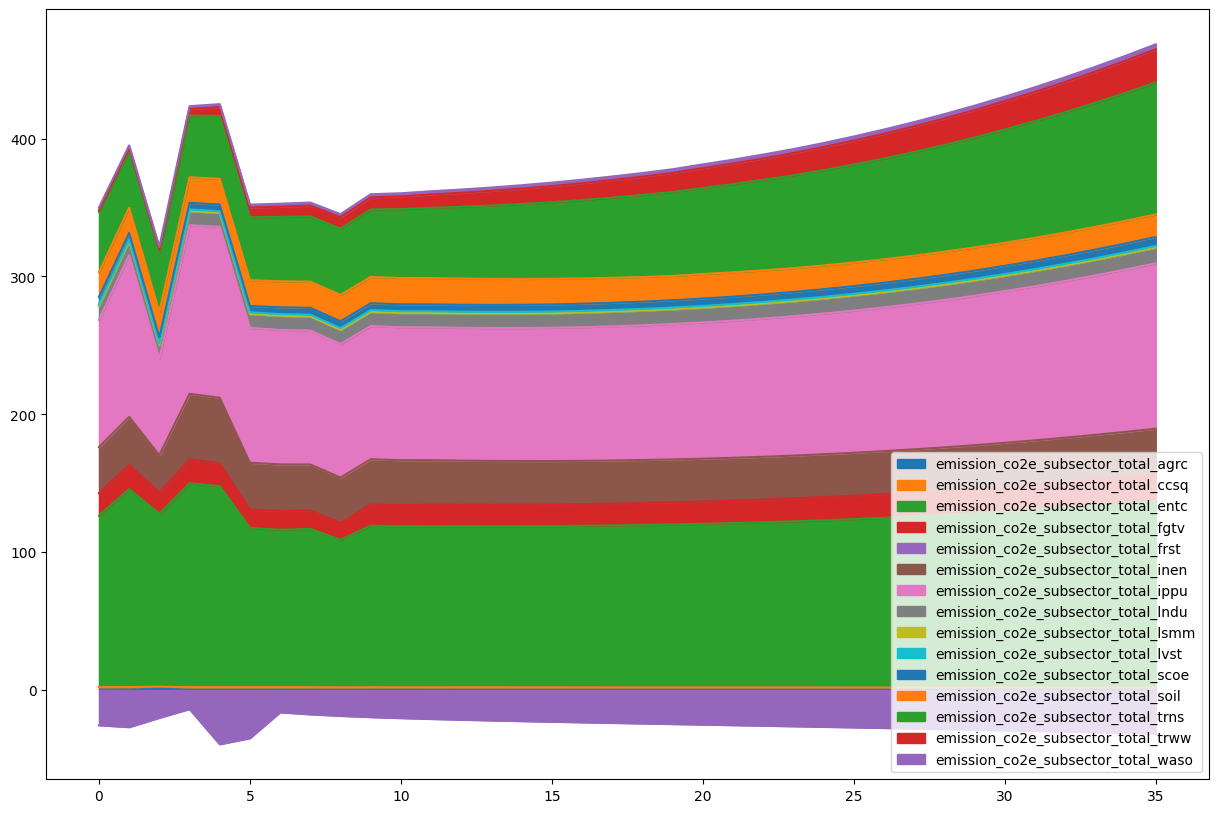

In [709]:
fig, ax = plt.subplots(figsize = (15, 10))

(
    df_out[[x for x in df_out.columns if x.startswith("emission_co2e_subsector_total")]]
    .plot
    .area(ax = ax)
)

<AxesSubplot: >

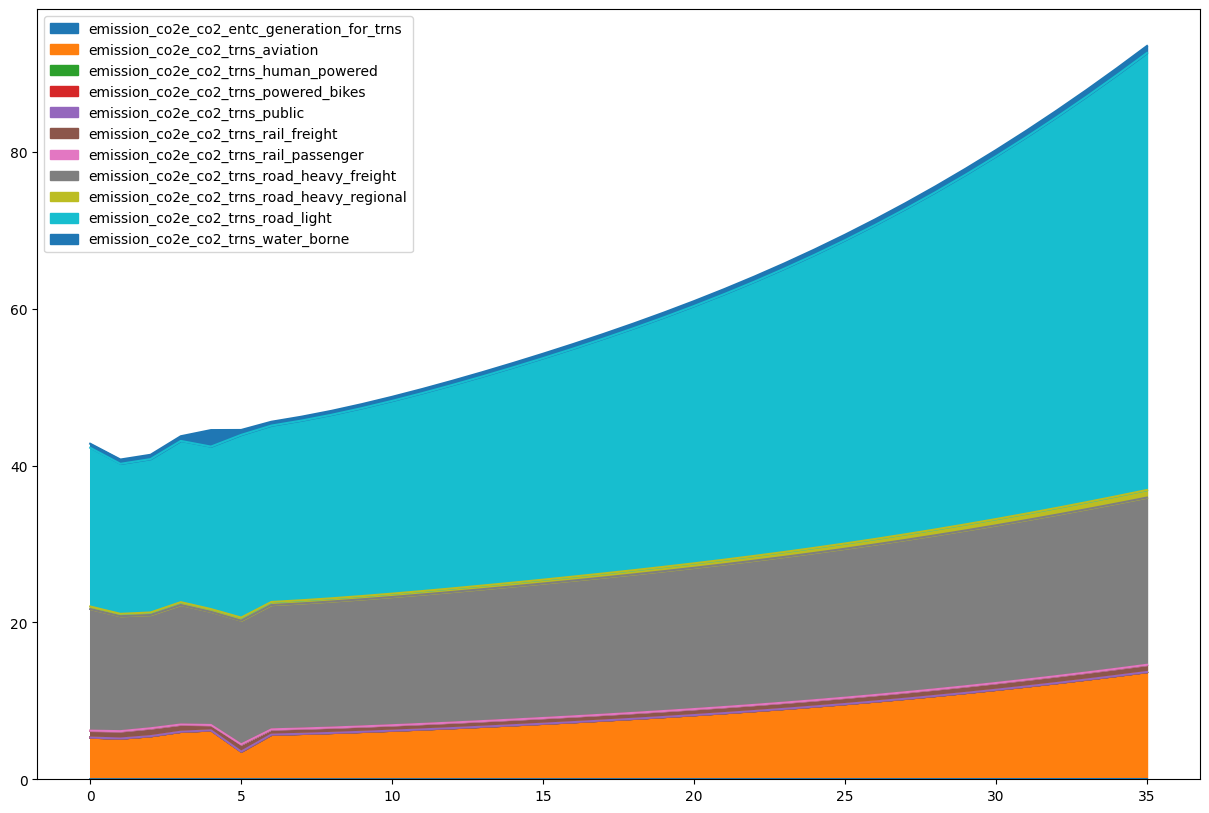

In [710]:
fig, ax = plt.subplots(figsize = (15, 10))

(
    df_out[[x for x in df_out.columns if x.startswith("emission_co2e_co2") and "trns" in x]]
    .plot
    .area(ax = ax)
)

In [698]:
[x for x in df_inputs_base_la.columns if x.startswith("deminit")]

['deminit_frst_wood_home_use_kg_per_hh',
 'deminit_trde_freight_mt_km',
 'deminit_trde_private_and_public_per_capita_passenger_km',
 'deminit_trde_regional_per_capita_passenger_km']

In [712]:
#df_out["emission_co2e_co2_trns_road_heavy_freight"]#"deminit_trde_freight_mt_km"]


In [669]:
(
    df_out[[x for x in df_out.columns if x.startswith("emission_co2e_trns")]]
    .plot
    .area(ax = ax)
)

TypeError: no numeric data to plot

##### 

In [713]:
dir_out = "/Users/jsyme/Documents/Personal Files/Other Work/Louisiana/quick_data/la_first_run_20240603"
df_inputs_base_la.to_csv(
    os.path.join(
        dir_out,
        "MODEL_INPUTS.csv"
    ),
    index = None,
    encoding = "UTF-8",
)

df_out.to_csv(
    os.path.join(
        dir_out,
        "MODEL_OUTPUTS.csv"
    ),
    index = None,
    encoding = "UTF-8",
)


<AxesSubplot: >

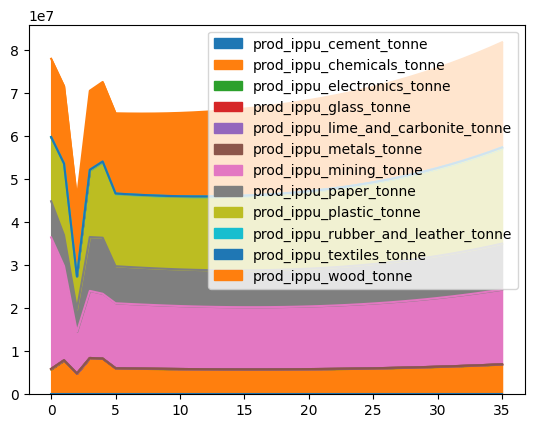

In [668]:

[x for x in dir(sisepuede.models.model_ippu) if x.startswith("modvar")]
modvar_prod = sisepuede.model_attributes.get_variable(
    sisepuede.models.model_ippu.modvar_ippu_qty_total_production
)

matt.extract_model_variable(df_out, modvar_prod).plot.area()

In [663]:
[x for x in df_out.columns if 

,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,area_agrc_crops_other_woody_perennial,area_agrc_crops_pulses,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,0.0,367983.831774,68239.857458,80.234375,79198.541655,6714.566582,1.154590e+06,0.0,357.684133,...,1607.703461,955073.693482,19786.484805,7.132381e+06,0.000000,985.642069,2.422231e+06,2.104457e+07,166526.651285,147.841681
1,1,0.0,362385.636787,67201.713944,79.013757,77993.681983,6612.416842,1.137025e+06,0.0,352.242629,...,1618.201188,978025.173334,22849.096189,8.147695e+06,33993.405536,1148.204785,2.272766e+06,2.016430e+07,170339.476720,150.359797
2,2,0.0,361096.126663,66962.583908,78.732596,77716.149895,6588.887271,1.132979e+06,0.0,350.989212,...,1574.244188,945124.232643,20042.187116,1.259799e+07,47833.319612,1389.455885,2.285081e+06,2.525521e+07,170252.877121,144.566821
3,3,0.0,359935.747562,66747.400257,78.479589,77466.409758,6567.713942,1.129338e+06,0.0,349.861311,...,1487.104127,951997.620585,22167.895406,6.139224e+06,25766.679230,1457.885138,2.426876e+06,2.538268e+07,162040.494052,147.924261
4,4,0.0,358773.521179,66531.874041,78.226180,77216.272044,6546.506906,1.125692e+06,0.0,348.731615,...,1583.188921,952671.199593,19588.348855,6.953864e+06,30526.044706,1125.040763,2.155513e+06,2.356779e+07,166703.308298,163.887648
5,5,0.0,356518.514996,66113.699961,77.734503,76730.943109,6505.360019,1.118616e+06,0.0,346.539725,...,1506.736753,922548.775023,19186.523338,6.633751e+06,30983.935377,1234.424681,2.303116e+06,2.514170e+07,171598.978968,153.595778
6,6,0.0,354279.480543,65698.487719,77.246309,76249.051656,6464.504566,1.111591e+06,0.0,344.363361,...,1482.052890,909456.270803,18526.606874,7.141430e+06,31448.694407,1203.527396,2.298660e+06,2.361482e+07,173103.124472,154.038993
7,7,0.0,352056.299497,65286.215373,76.761572,75770.572219,6423.938390,1.104616e+06,0.0,342.202405,...,1457.627059,896496.390978,17874.313543,6.823669e+06,31920.424823,1189.075143,2.214615e+06,2.414683e+07,174582.497325,154.471369
8,8,0.0,349848.854439,64876.861148,76.280265,75295.479526,6383.659346,1.097689e+06,0.0,340.056746,...,1433.456736,883667.859160,17229.565142,5.695942e+06,32399.231196,914.212353,2.260030e+06,2.277875e+07,176037.385085,154.893044
9,9,0.0,347657.028850,64470.403437,75.802365,74823.748501,6343.665309,1.090812e+06,0.0,337.926268,...,1409.539421,870969.410889,16592.284224,6.893902e+06,32885.219664,1154.387118,2.231894e+06,2.428428e+07,177468.072345,155.304151


In [637]:
df_inputs_base_la[
    [
        x for x in df_inputs_base_la.columns if "yf_" in x
    ]
    
]

,yf_agrc_bevs_and_spices_tonne_ha,yf_agrc_cereals_tonne_ha,yf_agrc_fibers_tonne_ha,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0.856600,5.674733,2.591700,20.037589,12.059233,2.946800,2.092420,0.0,3.109600,8.372200,81.15350,37.547100,28.821448
1,0.692600,5.398867,2.620600,20.479993,12.539800,3.455483,2.187880,0.0,2.575114,8.112100,79.72420,39.000100,29.765171
2,0.756000,5.373122,2.671300,19.994821,12.161233,3.041817,1.949340,0.0,2.254929,8.414700,82.41230,39.119475,28.720595
3,0.867600,5.257922,2.695400,18.948929,12.289167,3.375283,2.129140,0.0,2.446557,8.621300,86.06420,37.352525,29.482348
4,0.831500,5.610500,2.727800,20.238607,12.337700,2.992183,2.033160,0.0,2.563143,8.375900,78.39800,38.551850,32.769776
5,0.615736,5.791152,2.714397,19.383114,12.023165,2.949341,2.122310,0.0,2.536409,8.515683,83.50625,39.935028,30.906144
6,0.549868,5.921437,2.731432,19.186067,11.927444,2.865897,2.141667,0.0,2.534536,8.545547,84.27144,40.539678,31.191216
7,0.483999,6.051721,2.748467,18.989020,11.831723,2.782454,2.161023,0.0,2.532663,8.575410,85.03663,41.144328,31.476288
8,0.418131,6.182005,2.765502,18.791974,11.736001,2.699011,2.180380,0.0,2.530790,8.605273,85.80182,41.748977,31.761360
9,0.352263,6.312289,2.782537,18.594927,11.640280,2.615567,2.199737,0.0,2.528917,8.635137,86.56701,42.353627,32.046432


In [611]:
#df_out[[x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_lvst")]].plot.area()
units_energy = matt.get_unit("energy")
factor = units_energy.convert("pj", "kwh")

In [614]:
[
    x for x in df_out.columns
    if (
        ("inen" in x)
        & ("consump" in x)
    )
]

df_out["energy_consumption_inen_total"].iloc[0]*factor/25863420342

4.95240037551512

93.10831322375132

In [622]:
vec = (
    matt.extract_model_variable(
        df_out,
        m_elec.modvar_entc_nemomod_production_by_technology
    )
    .sum(axis = 1)
    .to_numpy()
)

vec * units_energy.convert("pj", "mwh")/(10**6)

array([286.09281355, 343.09650131, 272.99292652, 343.99635888,
       365.2220717 , 289.39480139, 286.36443778, 288.87895299,
       282.31228358, 282.52557833, 281.8214665 , 281.91533159,
       281.56850345, 281.40764465, 281.42881675, 281.62744233,
       282.00069587, 282.5487766 , 283.33725238, 284.30061359,
       285.73530394, 286.80895182, 288.29077885, 290.00896644,
       291.93073763, 294.06159467, 296.40522989, 299.48071342,
       303.35207818, 307.3656604 , 311.66007091, 315.9505037 ,
       320.38205771, 324.9435533 , 329.63679991, 334.45948597])

# Use the TransformationsIntegrated class to build input templates

- allows to specify any strategies/regions for which to build templates

- writes in-line to Excel templates

- for all strategies, about 5-min per (can and will improve this runtime)

- use `transformations_integrated.build_strategies_to_templates()` to build (docstring included with `?`)


**NOTE**: The `TransformationsIntegrated` class will instantiate a new SISEPUEDE AnalysisID, but the id does not correspond with a directory or any model runs. Ignore it

# NOTE TO JAMES:
- FIX ERROR WHERE transformations_integrated CANNOT INSTANTIATE A TEMPLATE IF IT DOESN'T EXIST
- Should be able to initialize a template with base_input_database_demo or input_template

In [90]:
importlib.reload(ma)
importlib.reload(sf)
importlib.reload(ing)
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(tbe)
importlib.reload(dte)
importlib.reload(dtr.dta)
importlib.reload(dtr)


reg = sc.Regions(sa.model_attributes)
time_periods = sc.TimePeriods(sa.model_attributes)

regions = [
    #"sri_lanka",
    "united_republic_of_tanzania"
]


year_0_ramp = 2025
dir_calibs = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo"
fp_inputs = os.path.join(dir_calibs, "input_all_sectors.csv")
fp_inputs = os.path.join(dir_calibs, "input_all_sectors_lka_tza.csv")
df_input = pd.read_csv(fp_inputs)


# get inputs from partner data
fp_inputs_from_partners = "/Users/jsyme/Documents/Personal Files/Other Work/WB_SISEPUEDE/tanzania/tanzania_inputs_for_sisepuede_20240529.csv"
df_input_from_diji = pd.read_csv(fp_inputs_from_partners)
field_region = "nation"

regions_run = [
    x for x in sorted(regions) if x in list(df_input[field_region].unique())
]


# TEMP FOR TANZANIA/SRI LANKA
def convert_trde_elasticities_to_one_by_last_tp(
    df_input: pd.DataFrame,
    time_periods: sc.TimePeriods,
    field_iso: str = "iso_code3"
) -> pd.DataFrame:
    """
    Convert TRDE elasticities to 1 by final time period
    """

    dfg = df_input.groupby([field_iso])
    df_input_new = []

    fields_to_one = [
        "elasticity_trde_pkm_to_gdppc_private_and_public",
        "elasticity_trde_pkm_to_gdppc_regional",
    ]
    
    vec_mix = np.array(
        [
            min(max((x - 9)/(max(time_periods.all_time_periods) - 9), 0), 1)
            for x in time_periods.all_time_periods
        ]
    )


    for region, df in dfg:
        
        region = region[0] if isinstance(region, tuple) else region
        
        for field in fields_to_one:
            
            vec = df[field].to_numpy()
            vec = vec*(1 - vec_mix) + vec_mix
            
            df[field] = vec
        
        df_input_new.append(df)
    
    df_input_new = (
        pd.concat(df_input_new, axis = 0)
        .reset_index(drop = True)
    )
    
    return df_input_new
     

run_q = (
    regions_run == [
        "sri_lanka",
        "united_republic_of_tanzania"
    ]
)
if run_q:
    
    time_periods = sc.TimePeriods(sa.model_attributes)
    df_input = convert_trde_elasticities_to_one_by_last_tp(
        df_input, 
        time_periods,
    )  





#regions_run = ["turkey", "india"]
#regions_run = ["dominican_republic"]

# reduce inputs
df_input = df_input[
    df_input[field_region].isin(regions_run)
].reset_index(drop = True)

def temp_input_adjs(
    df_inputs: pd.DataFrame,
) -> pd.DataFrame:
    """
    Add things to TZA/LKA
    """
    
    dfg = df_inputs.groupby(["iso_code3"])
    df_out = []
    
    for iso, df in dfg:
        iso = iso[0]
        
        # get a ramp
        n = len(df)
        vec_ramp = np.array([max((x - 9)/(n - 10), 0) for x in range(n)])


        if iso == "TZA":
            # add a productivity improvement to carrying capacity
            df["scalar_lvst_carrying_capacity"] = 1 + 0.3*vec_ramp
        
        elif iso == "LKA":
            # just make this up for now
            df["frac_gnrl_eating_red_meat"] = 0.5
    
        df_out.append(df)
        
    df_out = pd.concat(df_out)
    
    return df_out


df_input = temp_input_adjs(df_input)

# overwrite with data in data from Diji
df_input = sf.match_df_to_target_df(
    df_input,
    df_input_from_diji.drop(columns = time_periods.field_year),
    [time_periods.field_time_period]
) 



warnings.filterwarnings("ignore")

if True:
    # set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
    dict_config_te = {
        "categories_entc_max_investment_ramp": [
            "pp_hydropower"
            #"pp_nuclear"
        ],
        "categories_entc_renewable": [
            "pp_geothermal",
            "pp_hydropower",
            "pp_ocean",
            "pp_solar",
            "pp_wind"
        ],
        "categories_inen_high_heat": [
            "cement", 
            "chemicals", 
            "glass", 
            "lime_and_carbonite", 
            "metals"
        ],
        "dict_entc_renewable_target_msp": {
            "pp_solar": 0.15,
            "pp_geothermal": 0.1,
            "pp_wind": 0.15
        },
        "frac_inen_high_temp_elec_hydg": 0.5*0.45,
        "frac_inen_low_temp_elec": 0.95*0.45,
        "n_tp_ramp": None,
        "vir_renewable_cap_delta_frac": 0.0075,
        "vir_renewable_cap_max_frac": 0.125,
        "year_0_ramp": year_0_ramp
    }


    transformations_integrated = dtr.TransformationsIntegrated(
        dict_config_te,
        baseline_with_plur = False, # SET TO TRUE TO ALLOW THE BASELINE TO INCLUDE PLUR (NULLIFIES THE WITH PLUR STRAT)
        df_input = df_input,
        field_region = field_region,
        logger = logger,
        regions = regions_run,
    )



2024-05-29 16:56:36,439 - INFO - Successfully initialized Analysis ID 'sisepuede_run_2024-05-29T16:56:36.439289'
2024-05-29 16:56:36,442 - INFO - Verification of SISEPUEDE directory structure completed successfully with 0 errors.


MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-05-29 16:56:39,216 - INFO - NemoMod reference file checks completed successfully.
2024-05-29 16:56:39,219 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-05-29 16:56:39,230 - INFO - Initializing BaseInputDatabase


In [31]:

tp_max = max(transformations_integrated.time_periods.all_time_periods)
df_base = transformations_integrated.baseline_inputs
regions = sc.Regions(transformations_integrated.model_attributes)
time_periods = transformations_integrated.time_periods

df_base_gouped = sf.group_df_as_dict(
    df_base,
    [field_region]
)

# initialie dictionary of field diffs
dict_diffs = {}
run = [x for x in transformations_integrated.all_transformations_non_baseline if True]

for strategy in run:
    
    # run the transformation
    func = transformations_integrated.get_strategy(strategy)
    df = func()
    dfg = df.groupby([field_region])
    
    field_diff = []
    
    for i, df_cur in dfg:
        region = i[0]
        
        # get the baseline
        dfb = df_base_gouped.get(region)
        if dfb is None:
            continue
        
        # filter to final time period
        series_base = (
            dfb[
                dfb[time_periods.field_time_period].isin([tp_max])
            ]
            .iloc[0]
            .to_dict()
        )
        
        series_cur = (
            df_cur[
                df_cur[time_periods.field_time_period].isin([tp_max])
            ]
            .iloc[0]
            .to_dict()
        )
        
        
        keys = list(set(series_base.keys()) | set(series_cur.keys()))
        
        for field in keys:
            
            # skip if strategy id
            if field == transformations_integrated.key_strategy:
                continue
            
            # get values and verify they're numeric
            val_base = series_base.get(field)
            val_cur = series_cur.get(field)
            
            skip_q = not sf.isnumber(val_base)
            skip_q |= not sf.isnumber(val_cur)
            if skip_q:
                continue
            
            # check values
            
            err = val_base - val_cur
            err *= (1/val_base) if (val_base != 0) else 1.0
            err = np.abs(err)
            
            if err > 0.000001:
                field_diff.append(field)
    
    field_diff = list(set(field_diff))
    field_diff.sort()
    
    dict_diffs.update({strategy: field_diff})
            
                

            

def add_strategy_codes(
    df_fields_diff_by_strategy: pd.DataFrame,
    model_attributes: ma.ModelAttributes,
    table_sc: str = "strategy_code"
) -> pd.DataFrame:
    """
    get mapping of singleton strategies to transformation codes
    """
    
    attr = model_attributes.get_other_attribute_table(table_sc)
    attr_strat = model_attributes.get_dimensional_attribute_table("strategy_id")
    strat_map = attr_strat.field_maps.get(
        f"{attr_strat.key}_to_{table_sc}"
    )
    
    df_fields_diff_by_strategy[attr.key] = (
        df_fields_diff_by_strategy[model_attributes.dim_strategy_id]
        .apply(
            strat_map.get
        )
    )
    
    return df_fields_diff_by_strategy



def map_singleton_strategies_to_transformation_codes(
    model_attributes: ma.ModelAttributes,
    field_sum: str = "sum",
    table_sc: str = "strategy_code"
) -> pd.DataFrame:
    """
    Generate a table mapping singleton strategies to their associated transformation code
    """
    
    attr = model_attributes.get_other_attribute_table("strategy_code")
    attr_strat = model_attributes.get_dimensional_attribute_table("strategy_id")
    strat_map = attr_strat.field_maps.get(
        f"{attr_strat.key}_to_{table_sc}"
    )
    df_codes = attr.table.copy()

    df_codes[field_sum] = (
        df_codes
        .drop(
            columns = attr.key
        )
        .sum(axis = 1)
    )
    
    # get only singeltons
    df_codes = df_codes[
        df_codes[field_sum] == 1
    ]
    
    
    df_codes = df_codes.melt(attr.key)
    df_codes = (
        df_codes[
            ~df_codes["variable"].isin([field_sum])
            & ~df_codes["value"].isin([0])
        ]
        .drop(columns = "value")
        .reset_index(drop = True)
    )
    
    df_codes["variable"] = [x.upper() for x in list(df_codes["variable"])]
    
    # update code as strategy key
    """
    df_codes[attr.key] = (
        df_codes[model_attributes.dim_strategy_id]
        .apply(
            strat_map.get
        )
    )
    """;
    
    return df_codes

                
# build difference data frame
df_fields_diff_by_strategy = []

for k, v in dict_diffs.items():
    
    df = pd.DataFrame({"field": v})
    df[transformations_integrated.key_strategy] = k
    df_fields_diff_by_strategy.append(df)
    
df_fields_diff_by_strategy = (
    pd.concat(df_fields_diff_by_strategy)
    .get([transformations_integrated.key_strategy, "field"])
    .reset_index(drop = True)
)





In [34]:

# function to get mapping of singleton strategies to transformation codes
def add_strategy_codes(
    df_fields_diff_by_strategy: pd.DataFrame,
    model_attributes: ma.ModelAttributes,
    table_sc: str = "strategy_code"
) -> pd.DataFrame:
    """
    add strategy codes to the df_fields_diff_by_strategy table
    """
    
    attr = model_attributes.get_other_attribute_table(table_sc)
    attr_strat = model_attributes.get_dimensional_attribute_table("strategy_id")
    strat_map = attr_strat.field_maps.get(
        f"{attr_strat.key}_to_{table_sc}"
    )
    
    df_fields_diff_by_strategy[attr.key] = (
        df_fields_diff_by_strategy[model_attributes.dim_strategy_id]
        .apply(
            strat_map.get
        )
    )
    
    return df_fields_diff_by_strategy
        

    
# get 1:1 for applicable strategies -> transformations
matt = transformations_integrated.model_attributes
attr_code = matt.get_other_attribute_table("strategy_code")
df_code_to_tx = map_singleton_strategies_to_transformation_codes(matt)
df_fields_diff_by_strategy = add_strategy_codes(df_fields_diff_by_strategy, matt, )
    

df_write = (
    pd.merge(
        df_fields_diff_by_strategy,
        df_code_to_tx,
        how = "inner"
    )
    .drop(
        columns = [
            transformations_integrated.key_strategy,
            attr_code.key,
        ]
    )
    .rename(columns = {"variable": "transformation_code"})
)



##  write to output
dir_exp = (
    transformations_integrated
    .file_struct
    .dir_out
)

path_exp = os.path.join(dir_exp, "transformation_field_differences_20240410.csv")

df_write.drop_duplicates(inplace = True)
df_write.to_csv(
    path_exp,
    encoding = "UTF-8",
    index = None,
)



##  Read in Trajectory Group Assignments if not inferring only from simplex
- create `df_new_vargroups`
- pass to `transformations_integrated.build_strategies_to_templates()` as `df_trajgroup` argument to set trajectory groups

In [32]:

# get data frame mapping variables to new variable trajectory groups
df_new_vargroups = pd.read_csv("/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/experiments_and_analysis/remapping_of_variable_groups_in_intensity_runs_10_12.csv")
(
    df_new_vargroups
    .rename(
        columns = dict(
            (x, x.lower().strip().replace(" ", "_"))
            for x in ["Variable Specification", "new group"]
        ),
        inplace = True,
    )
)

field_vs = "variable_specification"
field_variable = "variable"
field_new_group = "new_group"
field_tg = "variable_trajectory_group"
df_new_vargroups = (
    df_new_vargroups[[field_vs, field_new_group]]
    .rename(columns = {field_vs: field_variable})
)

# build dictionary
dict_var_to_ng = sf.build_dict(df_new_vargroups[[field_variable, field_new_group]])
dict_ng_to_tg = sorted(list(set(df_new_vargroups[field_new_group])))
dict_ng_to_tg = dict(
    (x, i + 1)
    for i, x in enumerate(dict_ng_to_tg)
)

dict_var_to_tg = {}

dfg = (
    df_new_vargroups
    .groupby([field_new_group])
)

i = 1
for ng, df in dfg:
    
    ng = ng[0] if isinstance(ng, tuple) else ng
    trajgroup = dict_ng_to_tg.get(ng)
    dict_var_to_tg.update(
        dict(
            (x, trajgroup) for x in list(df[field_variable])
        )
    )
    
    i += 1



# update field out
df_new_vargroups[field_tg] = df_new_vargroups[field_variable].apply(dict_var_to_tg.get)
df_new_vargroups.drop([field_new_group], axis = 1, inplace = True)

"""
df_trajgroup_assignments = sa.model_attributes.build_variable_dataframe_by_sector(
    None, 
    df_trajgroup = df_new_vargroups, 
    include_time_periods = False,
    include_simplex_group_as_trajgroup = True
)
""";




In [45]:
df_new_vargroups.to_csv("/Users/jsyme/Desktop/vargroups_for_sisepuede.csv", index = None, encoding = "UTF-8")

In [38]:
tab = sa.model_attributes.get_dimensional_attribute_table("strategy_id")

tab.table[
    (tab.table[tab.key] >= 5000)
    & (tab.table[tab.key] <= 5050)
]

,strategy_id,strategy,strategy_code,baseline_strategy_id,description
120,5001,PFLO: Better baseline,PFLO:BETTER_BASE,0,"Business as usual, but done better. Does not i..."
121,5002,PFLO: Healthier diets,PFLO:BETTER_DIETS,0,Reduce the fraction of the population eating r...
122,5003,PFLO: Healthier diets with partial land use re...,PFLO:BETTER_DIETS_PLUR,0,Reduce the fraction of the population eating r...
123,5004,PFLO: Change consumer behavior,PFLO:CHANGE_CONSUMPTION,0,Sweeping changes to consumer behavrior and soc...
124,5005,PFLO: Industrial point of capture CCSQ,PFLO:IND_INC_CCS,0,Specifies point-of-capture carbon capture and ...
125,5006,PFLO: Supply side technologies and transformat...,PFLO:SUPPLY_SIDE_TECH,0,Macro-scale transformations without consumer b...
126,5007,PFLO: All transformations without stopping def...,PFLO:ALL_NO_STOPPING_DEFORESTATION_PLUR,0,All transformations and partial land use reall...
127,5008,PFLO: All transformations,PFLO:ALL,0,All transformations
128,5009,PFLO: All transformations with partial land us...,PFLO:ALL_PLUR,0,All transformations
129,5010,PFLO: All transformations with partial land us...,PFLO:ALL_PLUR_NO_SILVOPASTURE,0,All transformations except for silvopasture


In [93]:
def get_strategies_from_codes(
    strategy_codes: Union[List[str], str],
) -> Union[List[int], None]:
    """
    Map codes to id as input
    """
    attr_strat = sa.model_attributes.get_dimensional_attribute_table(sa.model_attributes.dim_strategy_id)
    dict_map = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
    
    # check specification of codes
    strategy_codes = (
        [strategy_codes] 
        if isinstance(strategy_codes, str)
        else (
            strategy_codes
            if sf.islistlike(strategy_codes)
            else None
        )
    )
    
    if strategy_codes is None:
        return None
    
    # get ids to build
    strategies_build = [dict_map.get(x) for x in strategy_codes]
    strategies_build = [x for x in strategies_build if x is not None]
    out = (
        None
        if len(strategies_build) == 0
        else strategies_build
    )
    
    return out



    
strategy_codes_keep = [
    "BASE",
    "LNDU:PLUR",
    "PFLO:BETTER_BASE",
    "PFLO:CHANGE_CONSUMPTION",
    "PFLO:SUPPLY_SIDE_TECH",
    #"PFLO:ALL_NO_STOPPING_DEFORESTATION_PLUR",
    "PFLO:ALL",
    "PFLO:ALL_PLUR"
]
strategies_keep = get_strategies_from_codes(strategy_codes_keep)

if True:
    transformations_integrated.build_strategies_to_templates(
        df_trajgroup = df_new_vargroups, # passed to input_template.template_from_inputs()
        include_simplex_group_as_trajgroup = True, # passed to input_template.template_from_inputs()
        strategies = strategies_keep,
        #regions = ["uruguay"]#["mexico", "peru", "jamaica", "honduras", "brazil"],
    )

   

2024-05-29 16:57:17,024 - INFO - Starting build of 6 strategies in 1 regions...
2024-05-29 16:57:17,028 - INFO - Starting build for region united_republic_of_tanzania
2024-05-29 16:57:17,042 - INFO - 	Successfully built transformation strategy_id = 1015 ('LNDU: Partial land use reallocation') in 0.01 seconds.
2024-05-29 16:57:26,105 - INFO - 	Successfully built transformation strategy_id = 5001 ('PFLO: Better baseline') in 0.37 seconds.
2024-05-29 16:57:35,488 - INFO - 	Successfully built transformation strategy_id = 5004 ('PFLO: Change consumer behavior') in 0.37 seconds.
2024-05-29 16:57:47,052 - INFO - 	Successfully built transformation strategy_id = 5006 ('PFLO: Supply side technologies and transformations') in 1.8 seconds.
2024-05-29 16:58:00,630 - INFO - 	Successfully built transformation strategy_id = 5008 ('PFLO: All transformations') in 2.3 seconds.
2024-05-29 16:58:13,133 - INFO - 	Successfully built transformation strategy_id = 5009 ('PFLO: All transformations with partial l

In [51]:
fp_write = os.path.join(os.path.dirname(os.getcwd()), "ref", "variable_specification_sample_groups.csv")

df_new_vargroups.to_csv(
    fp_write,
    index = None,
    encoding = "UTF-8",
)


In [ ]:
fp_read = os.path.join(
    sisepuede.file_struct.dir_ref, 
    "variable_specification_sample_groups.csv"
)
df_new_vargroups = pd.read_csv(fp_read)


'/Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref'

# Option to run SISEPUEDE

In [95]:
import sisepuede as ssp
importlib.reload(ssp)

sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions_run
)





MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-05-29 16:58:59,432 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-05-29 16:58:59,439 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-05-29 16:58:59,441 - INFO - 	Setting export engine to 'sqlite'.
2024-05-29 16:58:59,471 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-05-29 16:58:59,473 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-05-29 16:58:59,476 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-05-29 16:58:59,479 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-05-29 16:58:59,483 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-05-29 16:58:59,485 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-05-29 16:58:59,488 - WARNING - No index

In [100]:

dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [0, 1015, 5008, 5009]#[0, 1015, 5001, 5004, 5006, 5007, 5009]1015, 5008,
}


dict_primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2,
    include_electricity_in_energy = True,
    reinitialize_output_table_on_verification_failure = True,
    thresholds = (10**(-5), 10**4.5),
)




2024-05-29 17:07:00,155 - INFO - 
***	STARTING REGION united_republic_of_tanzania	***

2024-05-29 17:07:09,042 - INFO - Trying run primary_id = 15015 in region united_republic_of_tanzania
2024-05-29 17:07:09,044 - INFO - Running AFOLU model
2024-05-29 17:07:09,396 - INFO - AFOLU model run successfully completed
2024-05-29 17:07:09,397 - INFO - Running CircularEconomy model
2024-05-29 17:07:09,494 - INFO - CircularEconomy model run successfully completed
2024-05-29 17:07:09,494 - INFO - Running IPPU model
2024-05-29 17:07:09,650 - INFO - IPPU model run successfully completed
2024-05-29 17:07:09,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2024-05-29 17:07:09,691 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-05-29 17:07:09,877 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2024-05-29 17:07:09,877 - INFO - Running Energy mo

2024-29-May 17:07:13.070 Started modeling scenario.
2024-29-May 17:09:02.199 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2024-05-29 17:09:02,632 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-05-29 17:09:02,705 - INFO - ElectricEnergy model run successfully completed
2024-05-29 17:09:02,706 - INFO - Running Energy (Fugitive Emissions)
2024-05-29 17:09:02,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-05-29 17:09:02,800 - INFO - Appending Socioeconomic outputs
2024-05-29 17:09:02,815 - INFO - Socioeconomic outputs successfully appended.
2024-05-29 17:09:02,824 - INFO - Model run for primary_id = 15015 successfully completed in 113.78 seconds (n_tries = 1).
2024-05-29 17:09:02,959 - INFO - Trying run primary_id = 128128 in region united_republic_of_tanzania
2024-05-29 17:09:02,960 - INFO - Running AFOLU model
2024-05-29 17:09:03,312

2024-29-May 17:09:06.275 Started modeling scenario.
2024-29-May 17:11:36.662 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2024-05-29 17:11:37,057 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-05-29 17:11:37,090 - INFO - ElectricEnergy model run successfully completed
2024-05-29 17:11:37,092 - INFO - Running Energy (Fugitive Emissions)
2024-05-29 17:11:37,178 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-05-29 17:11:37,178 - INFO - Appending Socioeconomic outputs
2024-05-29 17:11:37,201 - INFO - Socioeconomic outputs successfully appended.
2024-05-29 17:11:37,209 - INFO - Model run for primary_id = 128128 successfully completed in 154.25 seconds (n_tries = 1).
2024-05-29 17:11:40,063 - INFO - Table MODEL_OUTPUT successfully appended to database.
2024-05-29 17:11:40,077 - INFO - 
***	 REGION united_republic_of_tanzania COMPLETE	***

20

In [101]:
df_out = sisepuede.read_output(None)

In [103]:
df_check = df_out[
    df_out[sisepuede.key_time_period].isin([32])
]

matt = sisepuede.model_attributes
[x for x in dir(sisepuede.models.model_afolu) if x.startswith("modvar_lvst")]
modvar_lvst_pop = matt.get_variable(sisepuede.models.model_afolu.modvar_lvst_pop)

matt.extract_model_variable(df_check, modvar_lvst_pop)

,pop_lvst_buffalo,pop_lvst_cattle_dairy,pop_lvst_cattle_nondairy,pop_lvst_chickens,pop_lvst_goats,pop_lvst_horses,pop_lvst_mules,pop_lvst_pigs,pop_lvst_sheep
0,24435.0,1114033.0,3371456.0,100548240.0,142093.0,0.0,29873.0,1495461.0,16372.0
1,25367.0,1156532.0,3500072.0,56313014.0,147514.0,0.0,31013.0,837502.0,16997.0
2,14856.0,677396.0,2162086.0,100548240.0,92135.0,0.0,19371.0,1495461.0,10586.0
3,10349.0,471889.0,1490881.0,56313014.0,63402.0,0.0,13329.0,837502.0,7289.0


In [ ]:
df_plot = df_out[
    df_out[sisepuede.key_primary_id].isin([32])
]

fields_emissions = [x for x in df_out.columns if x.startswith("emission_co2e_subsec")]

df_plot[]

# Important step: Collect all variable specifications into levers (only run on generation of new templates)

In [38]:


dict_vs_levers = {}
all_levers = set({})

for region, ft in sisepuede.experimental_manager.dict_future_trajectories.items():
    dict_vs_levers.update({region: set({})})
    for i, su in ft.dict_sampling_units.items():
        if su.xl_type == "L":
            varspecs_l = set(su.variable_specifications)

            dict_vs_levers[region] |= varspecs_l
            all_levers |= varspecs_l


# next build dataframe of lever type
df_lever_type = sisepuede.model_attributes.build_variable_dataframe_by_sector(
    None, 
    include_time_periods = False,
    vartype = "input",
)

# function to assign type
def assign_type(
    var: str,
    lever_set: Union[str, None] = None,
) -> str:
    
    if not isinstance(all_levers, set):
        out = "X"
    else:
        out = "L" if var in lever_set else "X"
    
    return out


df_lever_type["xl_type"] = df_lever_type["variable"].apply(assign_type, lever_set = all_levers)
df_lever_type.drop(["subsector"], axis = 1, inplace = True)

if True:
    df_lever_type.to_csv(
        os.path.join(sisepuede.file_struct.dir_ref, "variable_specification_xl_types.csv"), 
        encoding = "UTF-8",
        index = None,
    )

In [43]:
#ft.dict_sampling_units.get(47).variable_specifications
#sorted(list(df_lever_type[df_lever_type["xl_type"].isin(["L"])]["variable"].unique()))

In [46]:
vars_to_add = sorted(list(all_levers - set(df_new_vargroups["variable"])))
for k in vars_to_add:
    print(k)

In [11]:
engine = sisepuede.database.db.engine

In [24]:
import sqlalchemy
import sql_utilities as sqlutil
importlib.reload(sqlutil)
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")


In [30]:
#sqlutil.get_table_names(engine)
table = "DepreciationMethod"

In [47]:
with engine.connect() as con:
    con.execute(sqlalchemy.text(query))


'delete from SpecifiedAnnualDemand;'

In [40]:
importlib.reload(sqlutil)
importlib.reload(elec)

<module 'sisepuede_models' from '/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/sisepuede_models.py'>

In [46]:

query = f"drop table {table};"

In [34]:
?con.execute

In [35]:
con.close()


In [15]:
def get_lhs_trajes(
    dict_filt: dict,
) -> Tuple[pd.Series, pd.Series, bool]:
    """
    Get LHS trajectories for input to generator
    """
    future_trajectories_cur = sisepuede.experimental_manager.dict_future_trajectories.get(region)
    lhs_design_cur = sisepuede.experimental_manager.dict_lhs_design.get(region)
    region_out = sisepuede.get_output_region(region)

    design = dict_filt.get(sisepuede.key_design)
    future = dict_filt.get(sisepuede.key_future)
    strategy = dict_filt.get(sisepuede.key_strategy)

    df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(design, return_type = pd.DataFrame)

    # reduce lhs tables - LEs
    df_lhs_l = (
        df_lhs_l[df_lhs_l[sisepuede.key_future].isin([future])] 
        if (df_lhs_l is not None) 
        else df_lhs_l
    )
    # Xs
    df_lhs_x = (
        df_lhs_x[df_lhs_x[sisepuede.key_future].isin([future])] 
        if (df_lhs_x is not None) 
        else df_lhs_x
    )


    ##  GENERATE INPUT BY FUTURE

    # determine if baseline future and fetch lhs rows
    base_future_q = (future == sisepuede.baseline_future)
    lhs_l = (
        df_lhs_l[df_lhs_l[sisepuede.key_future] == future].iloc[0] 
        if ((df_lhs_l is not None) and not base_future_q) 
        else None
    )
    lhs_x = (
        df_lhs_x[df_lhs_x[sisepuede.key_future] == future].iloc[0] 
        if ((df_lhs_x is not None) and not base_future_q) 
        else None
    )
    
    tup_out = lhs_l, lhs_x, base_future_q
    
    return tup_out

region = "brazil"
ftc = sisepuede.experimental_manager.dict_future_trajectories.get(region)

dict_filt = {
    "future_id": 11,
    "strategy_id": 5009,
    "design_id": 3
}

lhs_l, lhs_x, base_future_q = get_lhs_trajes(dict_filt)


df_in_base = ftc.generate_future_from_lhs_vector(
    None, 
    df_row_lhc_sample_l = 1.0, 
    future_id = 0, 
    baseline_future_q = True
)
df_in = ftc.generate_future_from_lhs_vector(
    lhs_x, 
    df_row_lhc_sample_l = lhs_l, 
    future_id = dict_filt.get("future_id"), 
    baseline_future_q = base_future_q
)

In [15]:
?pd.pivot

Signature:
pd.pivot(
    data: 'DataFrame',
    *,
    columns: 'IndexLabel',
    index: 'IndexLabel | lib.NoDefault' = <no_default>,
    values: 'IndexLabel | lib.NoDefault' = <no_default>,
) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
columns : str or object or a list of str
    Column to use to make new frame's columns.
index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    spe

In [308]:
df_out = sisepuede.read_output(None)


In [105]:
df_out = sisepuede.read_output(None)

all_primaries = sorted(list(df_out[sisepuede.key_primary].unique()))
df_in = []
 
for region in sisepuede.regions:
    for primary in all_primaries: 
        df_in_filt = sisepuede.generate_scenario_database_from_primary_key(primary)
        df_in.append(df_in_filt.get(region))

df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)


df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)





# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

for tab in ["ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

<AxesSubplot: xlabel='time_period'>

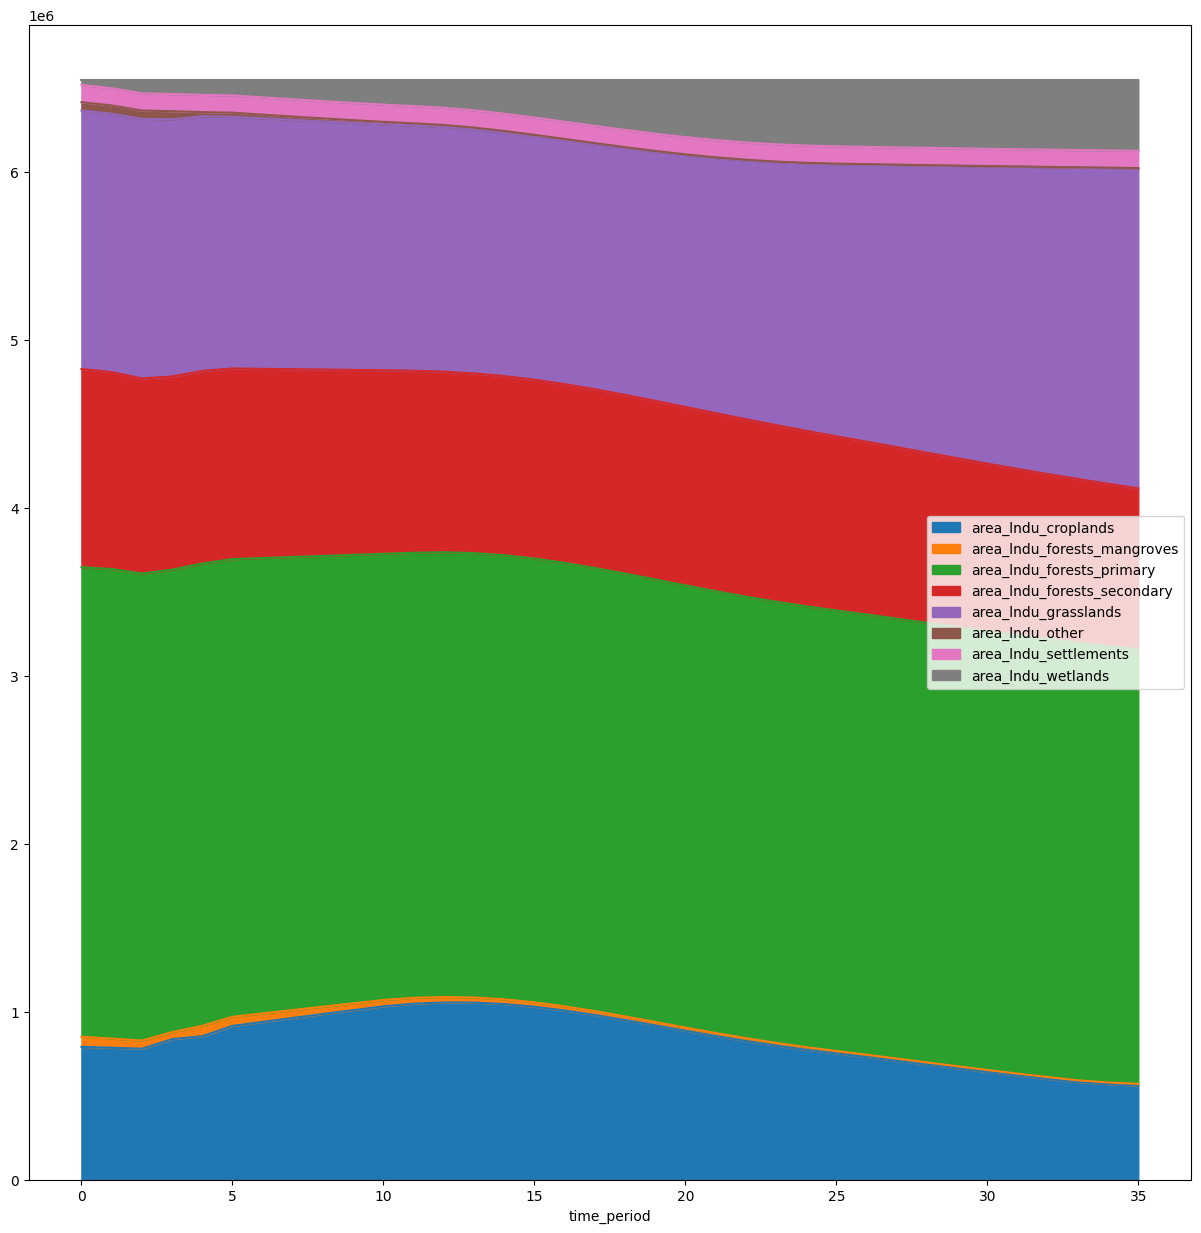

In [55]:
#sqlutil.get_table_names(engine, error_return = [])
df_plot = df_out[
    df_out[sisepuede.key_region].isin(["sri_lanka"])#united_republic_of_tanzania
    * df_out[sisepuede.key_primary].isin([15015])
]

#df_plot[[x for x in df_plot.columns if x.startswith("population_gnrl")]].sum(axis = 1).plot()
#df_plot[[x for x in df_plot.columns if ("elasticity" in x) & ("lvst" in x)]]#.sum(axis = 1).plot()

fields_plot = [x for x in df_plot.columns if x.startswith("emission_co2e_subsector_total")]
fields_plot = sisepuede.model_attributes.build_variable_fields("Land Use Area")

fig, ax = plt.subplots(figsize = (15, 15))
df_plot[
    ["time_period"] + fields_plot
].plot.area(x = "time_period", ax = ax)

<AxesSubplot: >

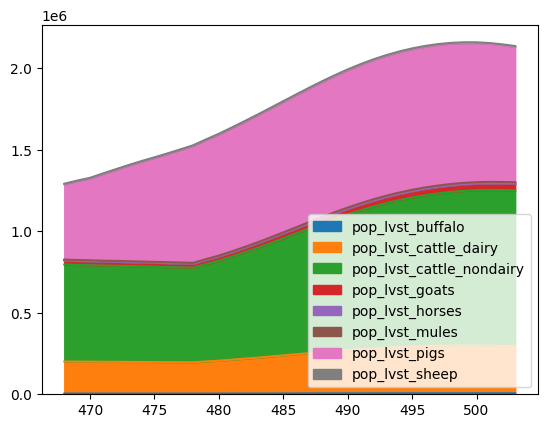

In [33]:
df_plot = df_out[
    df_out[sisepuede.key_region].isin(["united_republic_of_tanzania"])# united_republic_of_tanzania
    * df_out[sisepuede.key_primary].isin([128128])
]

fields_plot = [x for x in df_plot.columns if x.startswith("pop_lvst") & ("chickens" not in x)]

df_plot[fields_plot].plot.area()


In [362]:
df_plot[[x for x in df_plot.columns if ("energy_demand_enfu_subsector_total" in x) & ("fuel_electricity" in x)]].iloc[14]#.sum(axis = 1)

energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity       0.000000
energy_demand_enfu_subsector_total_pj_entc_fuel_electricity     245.229584
energy_demand_enfu_subsector_total_pj_inen_fuel_electricity      54.486174
energy_demand_enfu_subsector_total_pj_scoe_fuel_electricity    1005.276512
energy_demand_enfu_subsector_total_pj_trns_fuel_electricity      31.766681
Name: 482, dtype: float64

In [433]:
importlib.reload(sf)
sf.repeat_df(df_to_repeat, 5, axis = 0)

,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals
0,387469.051925,985966.225013
1,387469.051925,985966.225013
2,387469.051925,985966.225013
3,387469.051925,985966.225013
4,387469.051925,985966.225013


In [354]:
df_plot[[x for x in df_plot.columns if ("emission_co2e" in x) and ("frst" in x)]].sum(axis = 1)
df_plot[[x for x in df_plot.columns if ("emission_co2e_subsector_total" in x)]]#.sum(axis = 1)

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_ccsq,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_soil,emission_co2e_subsector_total_trns,emission_co2e_subsector_total_trww,emission_co2e_subsector_total_waso
468,21.537971,0.0,9.927777,2.166443,-72.548165,15.870563,9.788420,1.653923,0.110214,1.438326,1.201764,2.718127,31.691781,7.824866,6.944531
469,21.571802,0.0,10.786653,2.111410,-72.671047,14.024159,8.087037,3.658367,0.110617,1.434278,1.276298,2.761889,33.056384,8.264608,7.345827
470,21.588849,0.0,9.107120,2.069681,-73.013065,13.587886,8.639691,1.565995,0.111401,1.431995,1.409427,2.841953,35.544947,8.782375,7.756139
471,21.625083,0.0,11.992084,2.522446,-72.933034,17.894540,11.709319,1.473528,0.112129,1.428897,1.563072,2.887921,38.178687,9.315615,8.167110
472,21.636520,0.0,12.645397,2.566155,-73.197979,18.449263,14.300294,2.103310,0.112959,1.427746,1.744451,2.961028,41.340061,9.867336,8.579607
473,21.660978,0.0,13.356557,2.428800,-73.241764,19.272003,10.494148,2.112131,0.113813,1.425250,1.628742,3.033974,44.543244,10.494577,9.004576
474,21.685380,0.0,13.686046,2.477065,-72.737645,19.890359,11.543275,2.120928,0.114595,1.422714,1.791082,3.104808,47.462674,11.114135,9.428323
475,21.709722,0.0,14.371718,2.541749,-73.062243,20.640982,12.557195,2.129704,0.115440,1.420228,1.976831,3.173600,51.304239,11.775355,9.860722
476,21.734005,0.0,15.325082,2.630230,-73.347592,21.665625,13.938041,2.138456,0.116452,1.417884,2.222549,3.240160,56.625668,12.521403,10.312088
477,21.758230,0.0,16.371621,2.732614,-73.648866,22.877423,15.509475,2.147187,0.117522,1.415592,2.497190,3.303245,62.513946,13.312990,10.777124


In [17]:
region = "argentina"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, baseline_future_q = True)#True)


df = df_in[df_in[sisepuede.key_strategy].isin([0])]
ma = sisepuede.model_attributes
me = sisepuede.models.model_energy

l = me.modvar_dict_scoe_fuel_fractions_to_efficiency_factors.values()
l = list(l)

ma.extract_model_variable(
    df,
    me.modvar_inen_demscalar
)




,scalar_inen_energy_demand_cement,scalar_inen_energy_demand_chemicals,scalar_inen_energy_demand_electronics,scalar_inen_energy_demand_glass,scalar_inen_energy_demand_lime_and_carbonite,scalar_inen_energy_demand_metals,scalar_inen_energy_demand_mining,scalar_inen_energy_demand_other_product_manufacturing,scalar_inen_energy_demand_paper,scalar_inen_energy_demand_plastic,scalar_inen_energy_demand_recycled_glass,scalar_inen_energy_demand_recycled_metals,scalar_inen_energy_demand_recycled_paper,scalar_inen_energy_demand_recycled_plastic,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_recycled_textiles,scalar_inen_energy_demand_recycled_wood,scalar_inen_energy_demand_rubber_and_leather,scalar_inen_energy_demand_textiles,scalar_inen_energy_demand_wood
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992,0.995992
8,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000,0.992000
9,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024,0.988024


# TEMPORARY explore large file


In [16]:
import pyDOE2
import support_functions as sf

arr_lhs = pyDOE2.lhs(50, 1000)

arr_1 = 0.25 + 0.75*arr_lhs
arr_2 = sf.vec_bounds(0 + 1.1*arr_lhs, (0.1, 1))





array([[0.51311666, 0.1       , 0.11276483, ..., 0.29183442, 0.94203864,
        0.27645675],
       [0.15419762, 0.74405663, 1.        , ..., 0.89579985, 0.351214  ,
        0.82228035],
       [0.11958779, 0.29254485, 0.51906637, ..., 0.32560964, 0.63931434,
        0.34566855],
       ...,
       [0.20678951, 0.77948018, 0.22099268, ..., 0.83471367, 0.1       ,
        0.20876456],
       [0.80974961, 0.66747683, 0.4004126 , ..., 1.        , 0.15019093,
        0.62982672],
       [0.18813938, 0.86675428, 0.14431686, ..., 0.22581872, 0.1       ,
        0.71485728]])

In [98]:
importlib.reload(sf)
primary_id = 559566#560416
dict_scendata = sisepuede.generate_scenario_database_from_primary_key(
    primary_id,#124124,
    regions = None,
)
#560420

In [94]:
df_check = dict_scendata.get("mexico")
df_check["factor_waso_waste_per_capita_scalar_food"]

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    0.993933
12    0.987866
13    0.981798
14    0.975731
15    0.969664
16    0.963597
17    0.957530
18    0.951462
19    0.945395
20    0.939328
21    0.933261
22    0.927194
23    0.921126
24    0.915059
25    0.908992
26    0.902925
27    0.896858
28    0.890790
29    0.884723
30    0.878656
31    0.872589
32    0.866522
33    0.860454
34    0.854387
35    0.848320
Name: factor_waso_waste_per_capita_scalar_food, dtype: float64

In [158]:
df_out = sisepuede.models.project(
    dict_scendata.get("mexico"),
    include_electricity_in_energy = False,
    regions = ["mexico"],
)
#HEREHERE

NameError: name 'dict_scendata' is not defined

In [163]:
#df_check.drop(["test_field"], axis = 1, inplace = True)
df_out_all

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,559559,mexico,0,7.583471e+05,1.045668e+07,154650.650199,1.541673e+06,15372.260031,219371.180883,495356.533105,...,2.172567e+07,86535.319598,328401.791657,4.741907e+05,4.590173e+05,6.467137e+06,246107.752130,5.776439e+07,2.192960e+06,1.446732e+07
1,559559,mexico,1,7.801007e+05,1.075664e+07,159086.884663,1.585897e+06,15813.221318,225663.957487,509566.093310,...,2.357311e+07,87131.640125,324517.665949,6.029113e+05,4.767604e+05,6.894050e+06,267408.642424,5.880849e+07,2.209017e+06,1.522857e+07
2,559559,mexico,2,8.024582e+05,1.106492e+07,163646.274522,1.631348e+06,16266.424240,232131.429406,524170.128602,...,2.492349e+07,133275.043067,333274.409361,5.969025e+05,5.171984e+05,7.191975e+06,286529.190026,6.175411e+07,2.384790e+06,1.646965e+07
3,559559,mexico,3,8.254012e+05,1.138127e+07,168325.081381,1.677990e+06,16731.497200,238768.293748,539156.664655,...,2.515361e+07,127450.841401,349682.988145,7.040924e+05,5.716340e+05,7.627801e+06,289873.888348,6.227181e+07,2.639169e+06,1.778570e+07
4,559559,mexico,4,8.489116e+05,1.170545e+07,173119.582247,1.725785e+06,17208.070133,245569.269466,554513.776467,...,2.635557e+07,124469.412889,356587.628059,6.811330e+05,6.227922e+05,7.744647e+06,301991.824973,6.600747e+07,2.636402e+06,1.803139e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,559561,mexico,31,1.412757e+06,1.406875e+07,409154.712076,2.864273e+06,27577.289358,436361.449079,601306.997783,...,6.264658e+07,311349.219049,860001.427452,1.154555e+06,1.370203e+06,1.781511e+07,683000.467670,1.330522e+08,5.814525e+06,4.026856e+07
104,559561,mexico,32,1.433461e+06,1.407466e+07,416788.444065,2.903370e+06,27876.385631,443184.128906,602871.915623,...,6.324645e+07,313460.943988,869936.924240,1.152907e+06,1.374068e+06,1.795116e+07,688511.538385,1.329346e+08,5.856818e+06,4.056999e+07
105,559561,mexico,33,1.453846e+06,1.408379e+07,423893.400535,2.941151e+06,28163.748478,449779.275794,605117.136765,...,6.374279e+07,315077.555738,878381.223351,1.151301e+06,1.375684e+06,1.805821e+07,693084.185050,1.325822e+08,5.891283e+06,4.081822e+07
106,559561,mexico,34,1.473924e+06,1.409591e+07,430507.772720,2.977629e+06,28440.169920,456155.564804,607981.700771,...,6.413609e+07,316211.225181,885349.335199,1.149629e+06,1.375130e+06,1.813660e+07,696725.277964,1.320108e+08,5.917846e+06,4.101272e+07


In [161]:
importlib.reload(sf)
df_check2 = sf.add_data_frame_fields_from_dict(
    df_check.copy(),
    {
        "test_field": "test",
    },
    prepend_q = True,
    sort_input_fields = False,
)

df_check2.columns

Index(['test_field', 'time_period', 'ef_lvst_entferm_buffalo_kg_ch4_head',
       'ef_lvst_entferm_cattle_dairy_kg_ch4_head',
       'ef_lvst_entferm_cattle_nondairy_kg_ch4_head',
       'ef_lvst_entferm_goats_kg_ch4_head',
       'ef_lvst_entferm_sheep_kg_ch4_head', 'yf_agrc_bevs_and_spices_tonne_ha',
       'yf_agrc_cereals_tonne_ha', 'yf_agrc_fibers_tonne_ha',
       ...
       'vol_ippu_recycled_paper_m3_ww_per_tonne_production',
       'vol_ippu_recycled_plastic_m3_ww_per_tonne_production',
       'vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production',
       'vol_ippu_recycled_textiles_m3_ww_per_tonne_production',
       'vol_ippu_rubber_and_leather_m3_ww_per_tonne_production',
       'vol_ippu_textiles_m3_ww_per_tonne_production',
       'vol_ippu_wood_m3_ww_per_tonne_production',
       'yf_agrc_other_woody_perennial_tonne_ha', 'primary_id', 'region'],
      dtype='object', length=2190)

<AxesSubplot: >

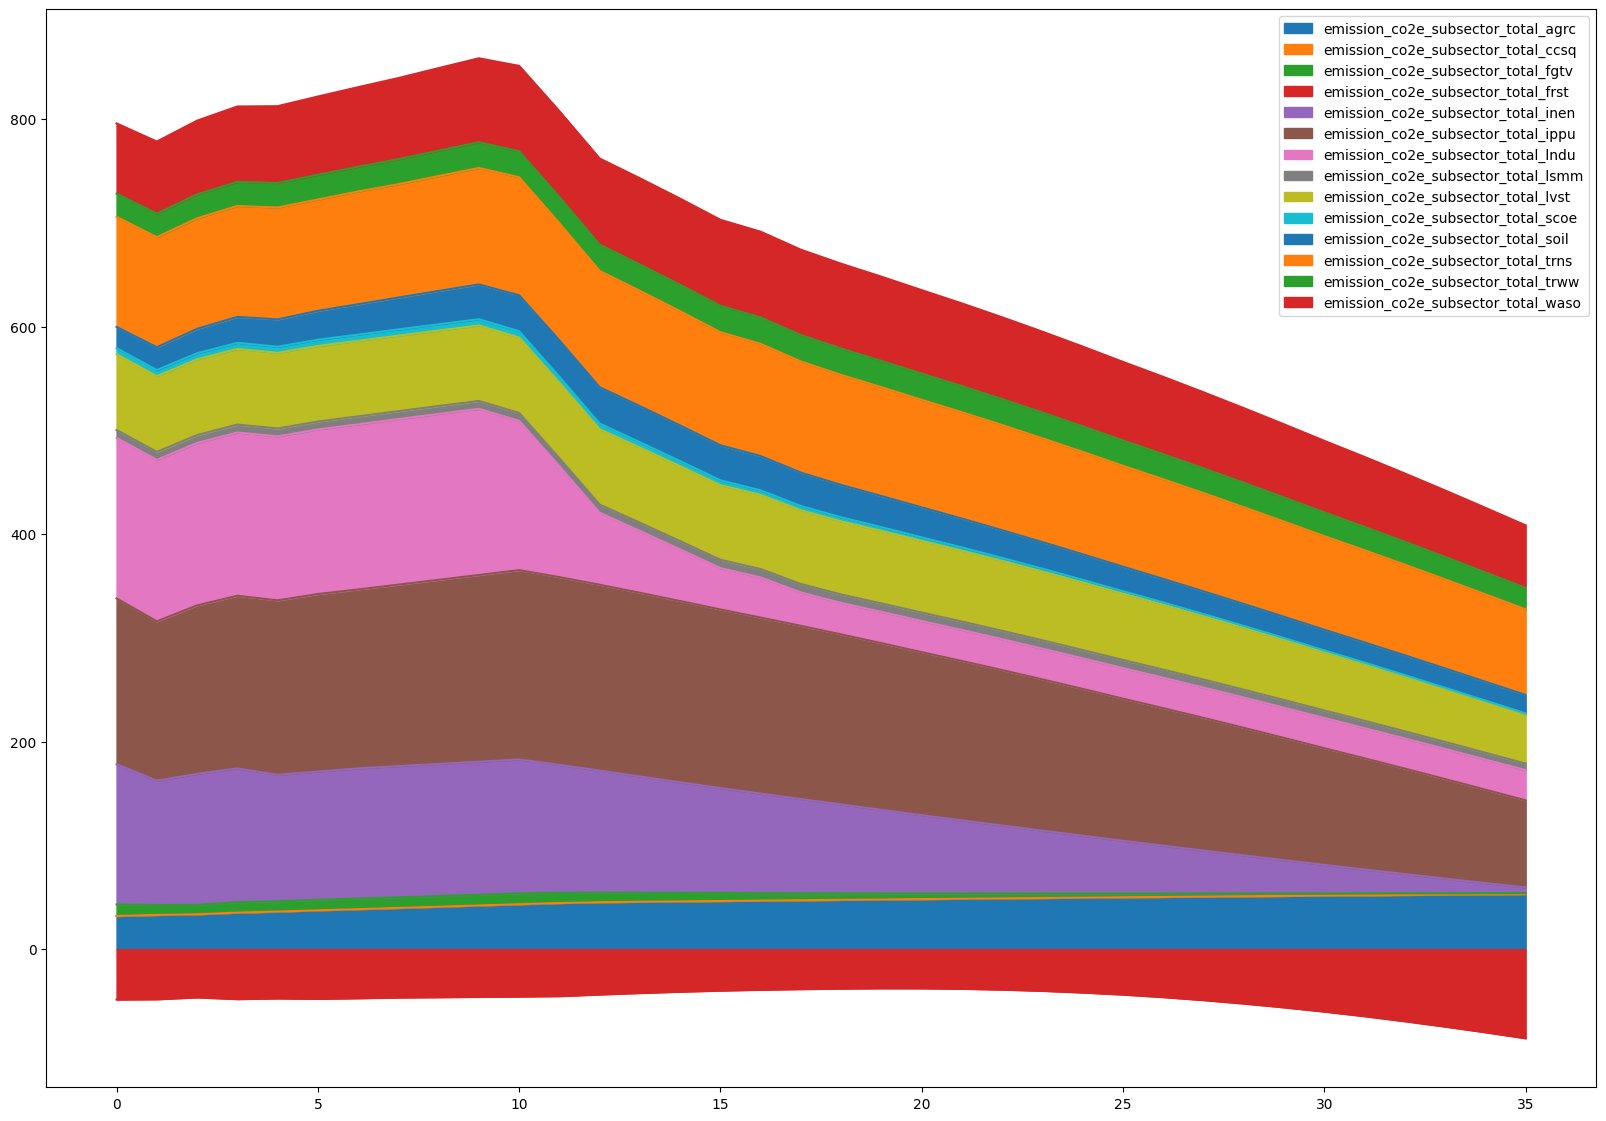

In [53]:
region = "united_republic_of_tanzania"

#df_plot

df_plot = df_out
    #df_out[sa.model_attributes.dim_region].isin([region])
    #& df_out[sa.model_attributes.dim_primary_id].isin([primary_id])



fields_plot = [x for x in df_plot.columns if ("emission_co2e_subsector_total" in x)]



fig, ax = plt.subplots(figsize = (20, 14))
df_plot[fields_plot].plot.area(ax = ax)


In [74]:
#df_out["emission_co2e_subsector_total_lsmm"]
df_run_information = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede/out/sisepuede_run_2023-10-13T01;33;54.419019/aws_run_information.csv")
df_run_information[
    df_run_information["region"].isin(["mexico"])
    & [str(primary_id) in x for x in list(df_run_information["primary_id"])]
]

,launch_index,instance_id,region,primary_id,random_seed,ip_address,n_launch_tries
1418,1418,i-0c233afcd3893b91c,mexico,"559565,559566,559567,559568,559569,559570,5595...",6401745,10.22.128.109,1


In [82]:
df_check_full_experiment = pd.read_csv("/Users/jsyme/Downloads/61c0ff9d-4024-42cd-aa4c-8eb2d03910b4.csv", nrows = 10000)
df_check_full_experiment[df_check_full_experiment["region"].isin(["mexico"])][["primary_id", "emission_co2e_subsector_total_lvst"]]

,primary_id,emission_co2e_subsector_total_lvst
432,0,73.041761
433,0,72.998398
434,0,72.949362
435,0,72.897254
436,0,72.859084
...,...,...
9535,559566,55.241439
9536,559566,53.813313
9537,559566,52.357631
9538,559566,50.880840


In [84]:
df_in = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede_launcher/sisepuede_run_2023-10-13t01;33;54.419019/model_input/region=mexico/model_input_1418/data.csv")
df_out = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede_launcher/sisepuede_run_2023-10-13t01;33;54.419019/model_output/region=mexico/model_output_1418/data.csv")


In [86]:
df_out["emission_co2e_subsector_total_lvst"]

0      73.041761
1      72.998398
2      72.949362
3      72.897254
4      72.859084
         ...    
463    54.674824
464    52.796107
465    50.900074
466    48.997007
467    47.149094
Name: emission_co2e_subsector_total_lvst, Length: 468, dtype: float64

In [30]:
len(set(sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").columns))
fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-08T01;34;53.827024/sisepuede_run_2023-07-08T01;34;53.827024_output_database.sqlite"

engine = sqlalchemy.create_engine(f"sqlite:///{fp}")


In [110]:
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database_ORIG.sqlite"
engine_orig = sqlalchemy.create_engine(f"sqlite:///{fp}")

In [113]:
df_prod = sqlutil.sql_table_to_df(engine_orig, "vproductionbytechnologyannual")


In [117]:
df_prod[df_prod["y"].isin(["1001"]) & df_prod["f"].isin(["fuel_coal"])]

,r,t,f,y,val,solvedtm
974,colombia,me_coal,fuel_coal,1001,2534.541279,2023-07-11 22:26:29.493


In [22]:
ft = sisepuede.experimental_manager.dict_future_trajectories.get(region)
#?ft.generate_future_from_lhs_vector

In [32]:
region = "brazil"
lhs_design_cur = sisepuede.experimental_manager.dict_lhs_design.get(region)
df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(
    0,
    return_type = pd.DataFrame
)
keep_futures = [0, 1]

df_lhs_l = (
    df_lhs_l[
        df_lhs_l[sisepuede.key_future].isin(keep_futures)
    ] 
    if (df_lhs_l is not None) 
    else df_lhs_l
)
# Xs
df_lhs_x = (
    df_lhs_x[
        df_lhs_x[sisepuede.key_future].isin(keep_futures)
    ] 
    if (df_lhs_x is not None) 
    else df_lhs_x
)

##  Optional Export of a Regionj to `temporary_full_inputs`

In [35]:
region = "brazil"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 15, baseline_future_q = False)#True)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(
    df_lhs_x, 
    df_row_lhc_sample_l = df_lhs_l, 
    future_id = 1, 
    baseline_future_q = False
)#True)

if False:
    # write to output for testing
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        index = None,
        encoding = "UTF-8"
    )

# Export Model Results to CSVs for Tableau

In [27]:
model_afolu = sisepuede.models.model_afolu
model_circecon = sisepuede.models.model_circecon
model_energy = sisepuede.models.model_energy
model_ippu = sisepuede.models.model_ippu

import sqlalchemy
# precursor function - can integrate with sisepuede or add in
def format_inputs(
    modvars_extract: Union[List[str], None],
    engine: sqlalchemy.engine.Engine,
    sisepuede_obj: ssp.SISEPUEDE,
    chunk_size: int = 10,
    force_overwrite_existing_primary_keys: bool = False,
    regions: Union[List[str], None] = None,
    table_name_attribute_primary: Union[str, None] = None,
    table_name_output: Union[str, None] = None,
) -> pd.DataFrame:
    """
    Retrieve inputs for merge
    
    Function Arguments
    ------------------
    """
    
    # table names
    table_name_attribute_primary = (
        sisepuede_obj.database.table_name_attribute_primary
        if not isinstance(table_name_attribute_primary, str)
        else table_name_attribute_primary
    )
    table_name_output = (
        sisepuede_obj.database.table_name_output
        if not isinstance(table_name_output, str)
        else table_name_output
    )
    
    # initialize regions
    field_region = sisepuede.key_region
    query = f"SELECT DISTINCT {field_region} FROM {table_name_output};"
    regions_avail = sqlutil.fetch_query_as_df(query, engine)
    
    # set and filter regions
    regions = (
        [x for x in sisepuede_obj.regions if x in regions]
        if sf.islistlike(regions)
        else sisepuede_obj.regions
    )
    regions = (
        [x for x in regions if x in list(regions_avail[field_region])]
        if regions_avail is not None
        else None
    )
    
    # get primary id info
    field_primary = sisepuede.key_primary
    query = f"SELECT DISTINCT {field_primary} FROM {table_name_output};"
    primary_ids_avail = sqlutil.fetch_query_as_df(query, engine)
    primary_ids_avail = (
        primary_ids_avail[field_primary]
        if primary_ids_avail is not None
        else None
    )
    
    
    # return none?
    return_none = regions is None
    return_none |= (len(regions) == 0) if (not return_none) else return_none
    return_none |= not (sf.islistlike(modvars_extract) | (modvars_extract is None))
    return_none |= primary_ids_avail is None
    return_none |= (len(primary_ids_avail) == 0) if (not return_none) else return_none
    
    if return_none:
        return None
    
    
    ##  PRIMARY SELECTION
    
    df_primary_keys = sisepuede_obj.odpt_primary.get_indexing_dataframe(
        key_values = primary_ids_avail
    )
    primary_keys = sisepuede_obj.get_primary_keys(list(df_primary_keys[sisepuede_obj.key_primary]))
    all_designs = list(df_primary_keys[sisepuede_obj.key_design].unique())
    
    # initializations
    df_out = []
    df_out_primary = []
    iterate_outer = 0

    # available indices and resolution
    idt = sisepuede_obj.database.db.dict_iterative_database_tables.get(
        sisepuede_obj.database.table_name_input
    )
    index_conflict_resolution = None
    index_conflict_resolution = "write_replace" if (force_overwrite_existing_primary_keys or (idt.index_conflict_resolution == "write_replace")) else None
    set_available_ids = idt.available_indices


    # 
    fields_ext = None
    if modvars_extract is not None:
        fields_ext = sisepuede_obj.model_attributes.build_variable_fields(modvars_extract)
    
    
    for region in regions:

        iterate_inner = 0

        # retrieve region specific future trajectories and lhs design
        future_trajectories_cur = sisepuede_obj.experimental_manager.dict_future_trajectories.get(region)
        lhs_design_cur = sisepuede_obj.experimental_manager.dict_lhs_design.get(region)
        region_out = sisepuede_obj.get_output_region(region)

        sisepuede_obj._log(f"\n***\t BUILDING INPUTS FOR REGION {region}\t***\n", type_log = "info")


        for design in all_designs:

            df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(
                design,
                return_type = pd.DataFrame
            )

            # get reduced set of primary keys
            df_primary_keys_cur_design = df_primary_keys[
                df_primary_keys[sisepuede_obj.key_design] == design
            ]
            keep_futures = sorted(list(set(df_primary_keys_cur_design[sisepuede_obj.key_future])))

            # reduce lhs tables - LEs
            df_lhs_l = (
                df_lhs_l[
                    df_lhs_l[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_l is not None) 
                else df_lhs_l
            )
            
            # Xs
            df_lhs_x = (
                df_lhs_x[
                    df_lhs_x[sisepuede_obj.key_future].isin(keep_futures)
                ] 
                if (df_lhs_x is not None) 
                else df_lhs_x
            )

            # next, loop over futures
            #  Note that self.generate_future_from_lhs_vector() will return a table for all strategies
            #  associated with the future, so we can prevent redundant calls by running all strategies
            #  that need to be run for a given future

            for future in keep_futures:

                # determine if baseline future and fetch lhs rows
                base_future_q = (future == sisepuede_obj.baseline_future)
                lhs_l = df_lhs_l[df_lhs_l[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_l is not None) and not base_future_q) else None
                lhs_x = df_lhs_x[df_lhs_x[sisepuede_obj.key_future] == future].iloc[0] if ((df_lhs_x is not None) and not base_future_q) else None

                # generate the futures and get available strategies
                df_input = future_trajectories_cur.generate_future_from_lhs_vector(
                    lhs_x,
                    df_row_lhc_sample_l = lhs_l,
                    future_id = future,
                    baseline_future_q = base_future_q
                )
                all_strategies = sorted(list(
                    set(df_input[sisepuede_obj.key_strategy])
                ))


                for strategy in all_strategies:

                    # get primary id info
                    df_primary_keys_cur_design_fs = df_primary_keys_cur_design[
                        (df_primary_keys_cur_design[sisepuede_obj.key_future] == future) &
                        (df_primary_keys_cur_design[sisepuede_obj.key_strategy] == strategy)
                    ].reset_index(drop = True)

                    id_primary = df_primary_keys_cur_design_fs[sisepuede_obj.key_primary]
                    id_primary = int(id_primary.iloc[0]) if (len(id_primary) > 0) else None
                    write_q = ((region_out, id_primary) not in set_available_ids) or (index_conflict_resolution == "write_replace")
                    tup = (region_out, id_primary)

                    if (id_primary in primary_keys) and write_q:

                        # filter the data frame down
                        df_input_cur = (
                            df_input[
                                df_input[sisepuede_obj.key_strategy].isin([strategy])
                            ]
                            .copy()
                            .reset_index(drop = True)
                            .sort_values(by = [sisepuede_obj.model_attributes.dim_time_period])
                            .drop([x for x in df_input.columns if x in sisepuede_obj.keys_index], axis = 1)
                        )
                        
                        if fields_ext is not None:
                            df_input_cur.drop(
                                [
                                    x for x in df_input_cur.columns 
                                    if (x not in fields_ext)
                                    & (x != sisepuede_obj.model_attributes.dim_time_period) 
                                ], 
                                axis = 1,
                                inplace = True
                            )

                        df_input_cur = sf.add_data_frame_fields_from_dict(
                            df_input_cur,
                            {
                                sisepuede_obj.key_region: region_out,
                                sisepuede_obj.key_primary: id_primary
                            },
                            prepend_q = True
                        )
                        df_out.append(df_input_cur)
        

    df_out = (
        pd.concat(df_out, axis = 0).reset_index(drop = True)
        if len(df_out) > 0
        else None
    )
    
    return df_out



def get_modvars_to_save(
) -> List[str]:

    # get model variables to keep
    modvars = []
    for subsec in ["Economy", "General"]:
        modvars += sisepuede.model_attributes.get_subsector_variables(subsec, var_type = "input")
    

    ##  AFOLU variables
    
    modvars += [
        model_afolu.modvar_agrc_emissions_ch4_rice,
        model_afolu.modvar_agrc_frac_residues_removed,
        model_afolu.modvar_agrc_frac_no_till, # conservation ag
        model_afolu.modvar_lndu_emissions_conv,
        model_afolu.modvar_lndu_frac_pastures_improved,
        model_afolu.modvar_lsmm_rf_biogas,
        model_afolu.modvar_lvst_ef_ch4_ef,
    ]
    
    modvars += model_afolu.modvar_list_lvst_mm_fractions
    
        
    ##  CircularEconomy variables
    modvars += [
        v.get("treatment_fraction") 
        for v in model_circecon.dict_trww_categories_to_wali_fraction_variables.values()
    ]
    
    modvars += [
        model_circecon.modvar_trww_rf_biogas_recovered,
        model_circecon.modvar_waso_frac_landfill_gas_ch4_to_energy,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_isw,
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_msw,
        model_circecon.modvar_waso_rf_landfill_gas_recovered,
        model_circecon.modvar_waso_waste_per_capita_scalar
    ]
    
    
    ##  Energy variables
    
    modvars += [
        model_energy.modvar_fgtv_frac_non_fugitive_flared,
        model_energy.modvar_fgtv_frac_reduction_fugitive_leaks,
        model_energy.modvar_inen_demscalar,
        model_energy.modvar_enfu_efficiency_factor_industrial_energy,

        # SCOE
        model_energy.modvar_scoe_demscalar_elec_energy_demand,
        model_energy.modvar_scoe_demscalar_heat_energy_demand,
        model_energy.modvar_scoe_efficiency_fact_heat_en_coal,
        model_energy.modvar_scoe_efficiency_fact_heat_en_diesel,
        model_energy.modvar_scoe_efficiency_fact_heat_en_electricity,
        model_energy.modvar_scoe_efficiency_fact_heat_en_gasoline,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hydrogen,
        model_energy.modvar_scoe_efficiency_fact_heat_en_kerosene,
        model_energy.modvar_scoe_efficiency_fact_heat_en_natural_gas,
        model_energy.modvar_scoe_efficiency_fact_heat_en_hgl,
        model_energy.modvar_scoe_efficiency_fact_heat_en_solid_biomass,
        
        # TRNS
        model_energy.modvar_trns_fuel_efficiency_biofuels,
        model_energy.modvar_trns_fuel_efficiency_diesel,
        model_energy.modvar_trns_fuel_efficiency_gasoline,
        model_energy.modvar_trns_fuel_efficiency_hgl,
        model_energy.modvar_trns_fuel_efficiency_hydrogen,
        model_energy.modvar_trns_fuel_efficiency_kerosene,
        model_energy.modvar_trns_fuel_efficiency_natural_gas,
        model_energy.modvar_trns_electrical_efficiency
    ]
    
    ##  IPPU variables
    
    modvars += [
        model_ippu.modvar_ippu_clinker_fraction_cement,
        model_ippu.modvar_ippu_capture_efficacy_co2,
        model_ippu.modvar_ippu_capture_prevalence_co2,
        model_ippu.modvar_ippu_scalar_production
    ]
    
    # add in FC emission factors
    modvars += sum(model_ippu.dict_fc_ef_modvars_by_type.values(), [])
    
    
    
    
    return modvars


attr_strat = sa.model_attributes.get_dimensional_attribute_table(sa.model_attributes.dim_strategy_id)
attr_strat_code = sa.model_attributes.get_other_attribute_table("strategy_code")
set(attr_strat.table[attr_strat_code.key]) - set(attr_strat_code.key_values)

{'AGRC:INC_CONSERVATION_AGRICULTURE',
 'FRST:DEC_DEFORESTATION',
 'LNDU:PLUR_INDIA_CC',
 'PFLO:ALL_PLUR_INDIA_CC',
 'PFLO:ALL_PLUR_NO_SILVOPASTURE',
 'PFLO:INDIA_CCDR_PLUR',
 'PFLO:INDIA_CCDR_PLUR_INDIA_CC',
 'PFLO:NET_ZERO_FROM_LE_EXPLORATION_1',
 'PFLO:NET_ZERO_FROM_LE_EXPLORATION_2',
 'PFLO:NET_ZERO_FROM_LE_EXPLORATION_3',
 'PFLO:NET_ZERO_FROM_LE_EXPLORATION_4',
 'PFLO:NET_ZERO_FROM_LE_EXPLORATION_5',
 'PFLO:PLACEHOLDER_1',
 'PFLO:PLACEHOLDER_10',
 'PFLO:PLACEHOLDER_2',
 'PFLO:PLACEHOLDER_3',
 'PFLO:PLACEHOLDER_4',
 'PFLO:PLACEHOLDER_5',
 'PFLO:PLACEHOLDER_6',
 'PFLO:PLACEHOLDER_7',
 'PFLO:PLACEHOLDER_8',
 'PFLO:PLACEHOLDER_9'}

In [29]:
del df_tmp

In [30]:
import sql_utilities as sqlutil
import sqlalchemy

vars_extract = sisepuede.model_attributes.build_variable_fields("NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")


# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None



# add in input variables
modvars_save = get_modvars_to_save()
df_in_merge = format_inputs(modvars_save, engine, sisepuede) # TEMP


subsectors = []
for sector in sorted(list(set(sisepuede.model_attributes.all_sectors))):#["Energy", "IPPU", ]:
    subsectors += sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.get_subsector_attribute_table()
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")


# index fields
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]


# build variable extract
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]
for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variable_fields.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur
    
vars_extract += [x for x in df_in_merge.columns if x not in fields_ind]



# export outputs only before merge
flds_ind_out = [x for x in fields_ind if x in df_out.columns]
flds_sort_out = sorted([x for x in vars_extract if x in df_out.columns])

df_out[flds_ind_out + flds_sort_out].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_OUTPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# export inputs only before merge
flds_ind_in = [x for x in fields_ind if x in df_in_merge.columns]
flds_sort_in = sorted([x for x in vars_extract if x in df_in_merge.columns])

df_in_merge[flds_ind_in + flds_sort_in].to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_ONLY.csv"),
    index = None,
    encoding = "UTF-8"
)


# finally, merge and export
df_melt = pd.merge(
    df_out,
    df_in_merge
)
fields_ext = sorted([x for x in vars_extract if x in df_melt.columns])
df_melt = df_melt[fields_ind + fields_ext];

df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)


# melt
"""
df_melt = pd.melt(
    df_melt,
    fields_ind,
    fields_ext
)

    
df_melt.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_LONG.csv"),
    index = None,
    encoding = "UTF-8"
)

""";

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


2024-03-18 08:14:21,827 - INFO - 
***	 BUILDING INPUTS FOR REGION sri_lanka	***

2024-03-18 08:14:30,145 - INFO - 
***	 BUILDING INPUTS FOR REGION united_republic_of_tanzania	***



TypeError: can only concatenate list (not "NoneType") to list

# Run the cell below to just export everything

In [35]:
all_primaries = sorted(list(df_out[sisepuede.key_primary].unique()))

df_in = []

for region in regions_run:
    for primary in all_primaries: 
        df_in_filt = sisepuede.generate_scenario_database_from_primary_key(primary)
        df_in.append(df_in_filt.get(region))

df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)


df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)





# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

for tab in ["ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

# Plot output

In [12]:
df_out_all = sisepuede.read_output(None)

"""
df_out_all[
    df_out_all["primary_id"].isin([127127])
][[x for x in df_out_all.columns if x.startswith("emission_co2e_subsector_total")]]
""";

In [ ]:
"""
import sqlalchemy
import sql_utilities as squ
fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-05T02;43;25.818306/sisepuede_run_2023-07-05T02;43;25.818306_output_database.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")
df = squ.sql_table_to_df(engine, "MODEL_OUTPUT")
""";


In [110]:
# get_lhs_trajes() is defined above, just a shortcut
dict_filt_check = {'design_id': 3, 'future_id': 11, 'strategy_id': 5009}
lhs_l, lhs_x, baseline_q = get_lhs_trajes(dict_filt_check)
lhs_l.get(1094)

0.6095540665607345

In [24]:
prims = df_out_all[df_out_all[sisepuede.key_region].isin([region])]["primary_id"].unique()
[sisepuede.odpt_primary.get_dims_from_key(x) for x in prims]

[(0, 5009, 0),
 (0, 5009, 11),
 (0, 5009, 473),
 (0, 5009, 889),
 (3, 5009, 0),
 (3, 5009, 473),
 (3, 5009, 889)]

In [14]:
df_out_all["region"].unique()

array(['mexico', 'peru', 'dominican_republic'], dtype=object)

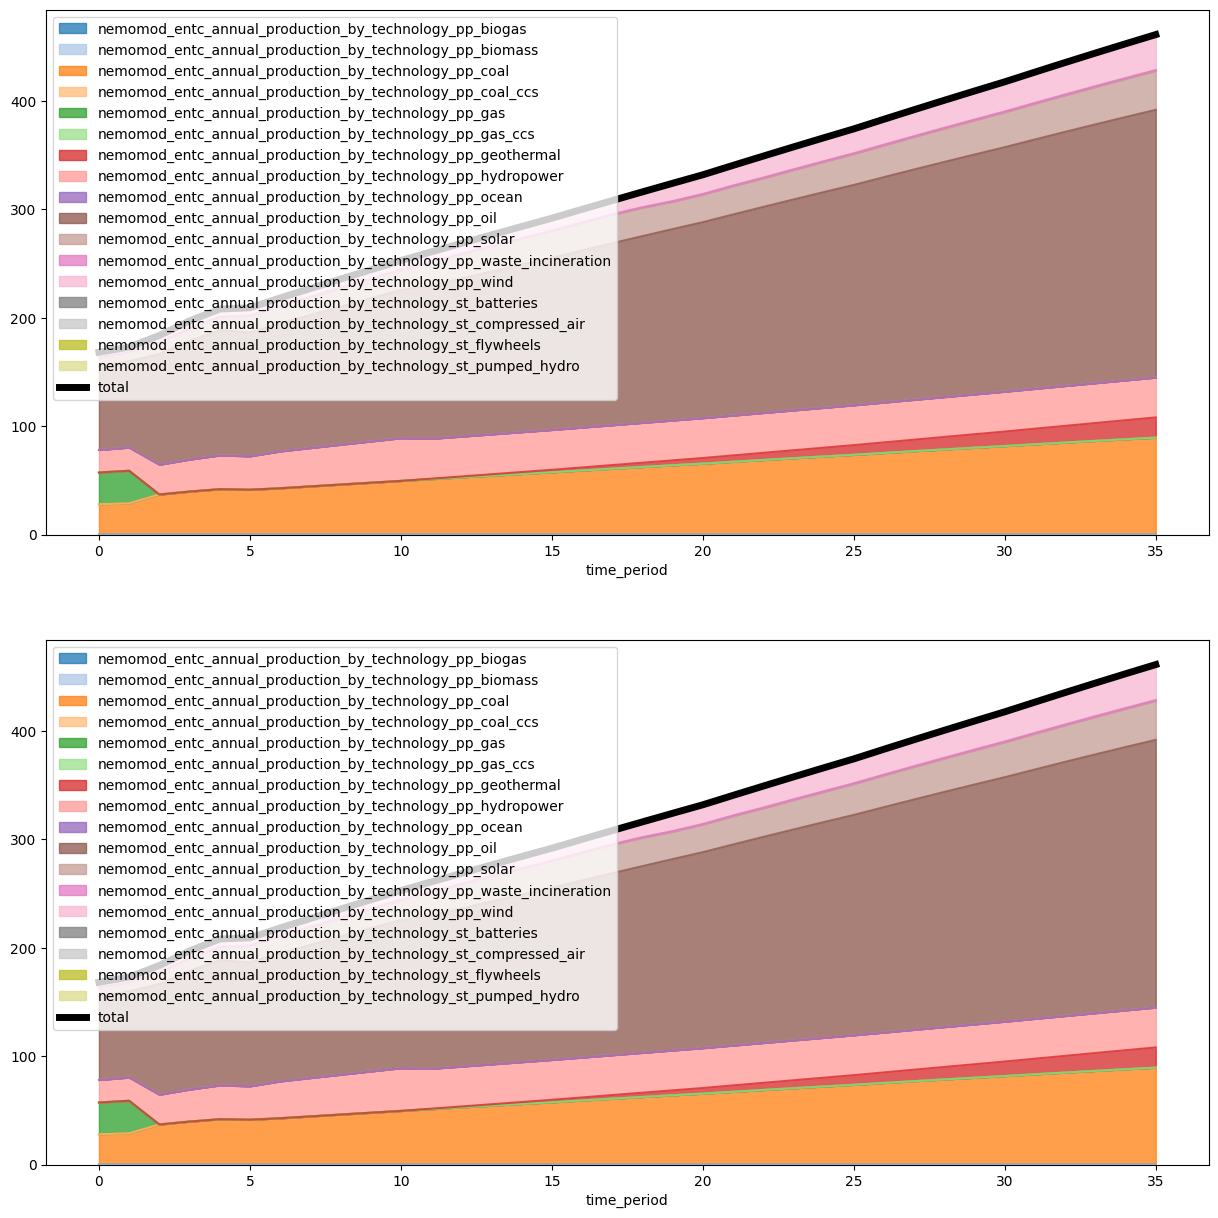

In [16]:

region = "dominican_republic"
df_out = df_out_all[
    df_out_all[sisepuede.key_region].isin([region])
]


# 3008, 3009, 303
strat_id, strat_id_intervention = 0, 0# 0, 5009
future_id, future_id_intervention = 0, 0#875
design_id = 0



def get_lhs_trajes(
    dict_filt: dict,
) -> Tuple[pd.Series, pd.Series, bool]:
    """
    Get LHS trajectories for input to generator
    """
    future_trajectories_cur = sisepuede.experimental_manager.dict_future_trajectories.get(region)
    lhs_design_cur = sisepuede.experimental_manager.dict_lhs_design.get(region)
    region_out = sisepuede.get_output_region(region)

    design = dict_filt.get(sisepuede.key_design)
    future = dict_filt.get(sisepuede.key_future)
    strategy = dict_filt.get(sisepuede.key_strategy)

    df_lhs_l, df_lhs_x = lhs_design_cur.retrieve_lhs_tables_by_design(design, return_type = pd.DataFrame)

    # reduce lhs tables - LEs
    df_lhs_l = (
        df_lhs_l[df_lhs_l[sisepuede.key_future].isin([future])] 
        if (df_lhs_l is not None) 
        else df_lhs_l
    )
    # Xs
    df_lhs_x = (
        df_lhs_x[df_lhs_x[sisepuede.key_future].isin([future])] 
        if (df_lhs_x is not None) 
        else df_lhs_x
    )


    ##  GENERATE INPUT BY FUTURE

    # determine if baseline future and fetch lhs rows
    base_future_q = (future == sisepuede.baseline_future)
    lhs_l = (
        df_lhs_l[df_lhs_l[sisepuede.key_future] == future].iloc[0] 
        if ((df_lhs_l is not None) and not base_future_q) 
        else None
    )
    lhs_x = (
        df_lhs_x[df_lhs_x[sisepuede.key_future] == future].iloc[0] 
        if ((df_lhs_x is not None) and not base_future_q) 
        else None
    )
    
    tup_out = lhs_l, lhs_x, base_future_q
    
    return tup_out





# set dictionaries
dict_filt2 = {
    sisepuede.key_design: design_id,
    sisepuede.key_future: future_id,
    sisepuede.key_strategy: strat_id,
}
dict_filt_intervention = {
    sisepuede.key_design: design_id,
    sisepuede.key_future: future_id_intervention,
    sisepuede.key_strategy: strat_id_intervention,
}
# update if any are missing
for k, val in dict_filt.items():
    if k not in dict_filt2.keys():
        dict_filt2.update({k: val[0]})
    if k not in dict_filt_intervention.keys():
        dict_filt_intervention.update({k: val[0]})
        


primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# get_lhs_trajes() is defined above, just a shortcut
lhs_l, lhs_x, baseline_q = get_lhs_trajes(dict_filt2)
df_in_filt = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(
    lhs_x, 
    df_row_lhc_sample_l = lhs_l, 
    future_id = future_id, 
    baseline_future_q = baseline_q,
)
df_in_filt = (
    df_in_filt[
        df_in_filt[sisepuede.key_strategy].isin([strat_id])
    ]
    .reset_index(drop = True)
)
        
        
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_intervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

# get_lhs_trajes() is defined above, just a shortcut
lhs_l_int, lhs_x_int, baseline_q_int = get_lhs_trajes(dict_filt_intervention)
df_in_filt_intervention = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(
    lhs_x_int, 
    df_row_lhc_sample_l = lhs_l_int, 
    future_id = future_id_intervention, 
    baseline_future_q = baseline_q_int,
)
df_in_filt_intervention = (
    df_in_filt_intervention[
        df_in_filt_intervention[sisepuede.key_strategy].isin([strat_id_intervention])
    ]
    .reset_index(drop = True)
)




############################
###                      ###
###    BEGIN PLOTTING    ###
###                      ###
############################

fig, ax = plt.subplots(2, 1, figsize = (15, 15))
#ax[0].set_ylim(-150, 350)
#ax[0].set_ylim(0, 900)
#ax[1].set_ylim(0, 900)

palette_func = plt.cm.tab20#plt.cm.hsv

flds = [sisepuede.key_time_period]
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            False
            or ("ccsq" in x) 
            or ("entc" in x)
            or ("enfu" in x)
            or ("fgtv" in x)
            or ("inen" in x)
            or ("scoe" in x)
            or ("trns" in x)
        )
    ]
    
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            #True
            ("agrc" in x)
            or ("frst" in x)
            or ("lndu" in x)
            or ("lsmm" in x)
            or ("lvst" in x)
            or ("soil" in x)
            #("entc" in x) 
            #or ("scoe" in x)
            #or ("lsmm" in x)
            #or ("soil" in x)
            #or ("frst" in x)
            #or ("lndu" in x)
        )
    ]
    
if False:
    flds = [x for x in flds if "trns" in x]
    
if True:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_") 
        and (
            True
            #and ("lvst" in x)
            #or ("fgtv" in x)
            #and ("subsector_total" not in x)
            and ("subsector_total" in x)
            and 
            (
                True
                #("lvst" in x)
                #or ("lsmm" in x)
                #or ("soil" in x)
            )
        )
    ]

if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("energy_demand_enfu_") 
        and (
            True
            #("entc" in x)
            #or ("fgtv" in x)
            #("inen" in x)
            & ("subsector" in x)
            & ("electricity" in x)
        )
    ]

if False:
    #flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu") and ("total" in x) and ("subsector" not in x)]# and (("natural_gas" in x) or ("crude" in x) or ("electricity" in x) or ("hydrogen" in x))]
    cat = "rail_passenger"
    pre = "energy_consumption_trns"
    fld_ignore = f"{pre}_{cat}"
    flds = [sisepuede.key_time_period] + [x for x in df_filt.columns if x.startswith(pre) and (cat in x) and (x != fld_ignore)]
    #flds = [x for x in df_filt.columns if x.startswith("passenger_distance")]

add_total = True
plot_from_modvar = True

if True:

    # AFOLU
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_converted_from_type
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_soil_emissions_co2_urea
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_pop
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_adjusted_equivalent_exports

    #modvar_plot = sisepuede.models.model_afolu.modvar_frst_emissions_co2_sequestration
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_emissions_conv
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_emissions_ch4_ef
    #modvar_plot = sisepuede.models.model_afolu.modvar_lsmm_emissions_ch4
    
    
    # ENERGY
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_energy_consumption_total
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trde_demand_pkm
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_mass_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_exports_fuel_adjusted
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_total
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_trns
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_vehicle_distance_traveled_electricity
    
    #IPPU
    #modvar_plot = sisepuede.models.model_ippu.modvar_ippu_qty_total_production
    
    
    
    # NO INTERVENTION
    
    df = sisepuede.model_attributes.extract_model_variable(
        df_filt,
        modvar_plot
    )
    df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt[flds] if (not plot_from_modvar) else df
    if len(df) > 0:
        for k in df.columns:
            vec = np.array(df[k])
            bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
            if (max(vec) > 0) and (min(vec) < 0):
                k0 = f"{k}_positive"
                k1 = f"{k}_negative"
                df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
                df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
                df.drop([k], axis = 1, inplace = True)
            else:
                df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[0], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[0], color = "black", linewidth = 5)
    df_plot_noint = df.copy()
        
        
    # INTERVENTION
    
    df = sisepuede.model_attributes.extract_model_variable(
        df_filt_intervention,
        modvar_plot
    )
    df = pd.concat([df_filt_intervention[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt_intervention[flds] if (not plot_from_modvar) else df
    
    if False:
        # UNCOMMENT TO USE DIFF
        vec = np.array(df[sisepuede.key_time_period])
        flds = [x for x in df.columns if (x != sisepuede.key_time_period)]
        df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)
        df[sisepuede.key_time_period] = vec

    
    
    for k in df.columns:
        vec = np.array(df[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
            df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
            df.drop([k], axis = 1, inplace = True)
        else:
            df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[1], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[1], color = "black", linewidth = 5)
    df_plot_int = df.copy()
    #df.plot(ax = ax[1], color = colors)



In [28]:
cols = [x for x in df_in_filt_intervention.columns if x.startswith("pij_lndu_forests_primary_to")]
print(df_in_filt[cols].tail())
print("\n" + "*"*50 + "\n")
print(df_in_filt_intervention[cols].tail())

    pij_lndu_forests_primary_to_croplands  \
31                           4.233223e-07   
32                           4.210720e-07   
33                           4.189189e-07   
34                           4.168576e-07   
35                           4.153487e-07   

    pij_lndu_forests_primary_to_forests_mangroves  \
31                                            0.0   
32                                            0.0   
33                                            0.0   
34                                            0.0   
35                                            0.0   

    pij_lndu_forests_primary_to_forests_primary  \
31                                      0.99999   
32                                      0.99999   
33                                      0.99999   
34                                      0.99999   
35                                      0.99999   

    pij_lndu_forests_primary_to_forests_secondary  \
31                                       0.000001 

In [13]:
cols = [x for x in df_filt.columns if x.startswith("emission_co2e_subsector_total")]
print(df_filt[cols].sum(axis = 1).tail())
print(df_filt_intervention[cols].sum(axis = 1).tail())

31    233.106720
32    201.619615
33    169.999025
34    138.055531
35    105.766456
dtype: float64
103    435.715588
104    413.661197
105    391.332363
106    368.489714
107    345.629959
dtype: float64


In [31]:
cols = [x for x in df_in_filt.columns if x.startswith("cost_enfu")]
print(df_in_filt[cols].tail())
print(df_in_filt_intervention[cols].tail())

    cost_enfu_fuel_biofuels_usd_per_m3  cost_enfu_fuel_biogas_usd_per_mmbtu  \
31                           31.635833                                 22.0   
32                           31.635833                                 22.0   
33                           31.635833                                 22.0   
34                           31.635833                                 22.0   
35                           31.635833                                 22.0   

    cost_enfu_fuel_biomass_usd_per_tonne  cost_enfu_fuel_coal_usd_per_tonne  \
31                                209.78                         104.889167   
32                                209.78                         104.889167   
33                                209.78                         104.889167   
34                                209.78                         104.889167   
35                                209.78                         104.889167   

    cost_enfu_fuel_coke_usd_per_tonne  cost_enfu_f

In [26]:
# get_lhs_trajes() is defined above, just a shortcut
dfi = dict_filt_intervention.copy()
dfi.update({"future_id": 11})

lhs_l_int, lhs_x_int, baseline_q_int = get_lhs_trajes(dfi)

ftc = sisepuede.experimental_manager.dict_future_trajectories.get(region)
df_in_filt_intervention = ftc.generate_future_from_lhs_vector(
    lhs_x_int, 
    df_row_lhc_sample_l = lhs_l_int, 
    future_id = future_id_intervention, 
    baseline_future_q = baseline_q_int,
)
df_in_filt_intervention = (
    df_in_filt_intervention[
        df_in_filt_intervention[sisepuede.key_strategy].isin([strat_id_intervention])
    ]
    .reset_index(drop = True)
)




baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	False
baseline_future_q:	True
baseline_future_q:	True
baseline_future_q:	False
baseline_future_q:	True
baseline_future_q:	True
baseline_futur

In [ ]:
lhs_l_int.get(1094)

0.6095540665607345

['frac_trns_pkm_dem_private_and_public_human_powered',
 'frac_trns_pkm_dem_private_and_public_powered_bikes',
 'frac_trns_pkm_dem_private_and_public_public',
 'frac_trns_pkm_dem_private_and_public_road_light',
 'frac_trns_pkm_dem_private_and_public_water_borne']

In [ ]:
import sampling_unit as su
importlib.reload(su)
#varnames = [
#    "cost_enfu_fuel_coal_usd_per_tonne",
#    "nemomod_enfu_renewable_energy_minimum_production_target_fuel_electricity"
#]
varnames = sisepuede.model_attributes.build_variable_fields("Private and Public Transportation Mode Share")


#df_ft = sisepuede.experimental_manager.dict_future_trajectories.get(region)
#df_ft = df_ft.input_database.copy()

df_ft = sisepuede.experimental_manager.base_input_database.database.copy()
df_ft = df_ft[
    df_ft["variable"].isin(varnames)
].reset_index(drop = True)
#df_ft["variable_trajectory_group_type"] = "lhs"

attr_strat = sisepuede.get_dimensional_attribute_table(sisepuede.key_strategy)

future_trajectories_cur = su.FutureTrajectories(
    df_ft,
    {sisepuede.key_strategy: 0},
    5,
    dict_all_dims = {sisepuede.key_strategy: attr_strat.key_values}
)


samp = future_trajectories_cur.dict_sampling_units.get(87)

lhs_x = 0.9#future_trajectories_cur.get_df_row_element(lhs_x_int, 2)
lhs_l = 0.582#future_trajectories_cur.get_df_row_element(lhs_l_int_test, 2)


lhs_l_int_test = pd.Series({87: lhs_l})

df = future_trajectories_cur.generate_future_from_lhs_vector(
    pd.Series({87: lhs_x}),#lhs_x_int, 
    df_row_lhc_sample_l = lhs_l_int_test, 
    future_id = None, 
    baseline_future_q = False,
)[varnames + ["time_period", "strategy_id"]]

df[df["time_period"].isin([35])];


samp.generate_future(
    None,
    lhc_trial_l = lhs_l,
    baseline_future_q = False
)

(
    df[
        df["time_period"].isin([33, 34, 35])
        & df["strategy_id"].isin([5009])
    ]
    .drop(["time_period", "strategy_id"], axis = 1)
    .sum(axis = 1)
)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 

4605    1.009179
4606    1.004789
4607    1.000000
dtype: float64

In [65]:
lhc_trial_x = lhs_x
lhc_trial_l = 1.0
baseline_future_q = False
constraints_mix_tg: tuple = (0, 1)
flatten_output_array: bool = False
vary_q: Union[bool, None] = None


vary_q = (
    samp.variable_trajectory_group_vary_q 
    if not isinstance(vary_q, bool) 
    else vary_q
)

# clean up some cases for None entries
baseline_comp = not sf.isnumber(lhc_trial_l)
baseline_comp |= (lhc_trial_l == 1) if not baseline_comp else False
baseline_future_q |= ((lhc_trial_x is None) & baseline_comp)
baseline_future_q |= (not vary_q)

lhc_trial_x = 1.0 if (lhc_trial_x is None) else lhc_trial_x
lhc_trial_l = 1.0 if (lhc_trial_l is None) else lhc_trial_l

# some additional checks for potential negative numbers
no_vary_x = (baseline_future_q | (lhc_trial_x < 0))
no_vary_l = (baseline_future_q | (lhc_trial_l < 0))
lhc_trial_x = 1.0 if (lhc_trial_x < 0) else lhc_trial_x
lhc_trial_l = 1.0 if (lhc_trial_l < 0) else lhc_trial_l

# initialization
all_strats = samp.dict_id_values.get(samp.key_strategy)
n_strat = len(all_strats)
strat_base = samp.dict_baseline_ids.get(samp.key_strategy)

# index by variable_specification at keys
dict_out = {}
rv = samp.uncertainty_ramp_vector


cat_mix = samp.dict_required_tg_spec_fields.get("mixing_trajectory")
cat_b0 = samp.dict_required_tg_spec_fields.get("trajectory_boundary_0")
cat_b1 = samp.dict_required_tg_spec_fields.get("trajectory_boundary_1")

# use mix between 0/1 (0 = 100% trajectory_boundary_0, 1 = 100% trajectory_boundary_1)
for vs in samp.variable_specifications[0:4]:

    # get scalar diff arrays, which are applied to baseline
    dict_scalar_diff_arrays = samp.dict_scalar_diff_arrays.get((vs, None))
    dict_var_info = samp.dict_variable_info.get((vs, None))

    # get any information 
    default = samp.dict_ordered_trajectory_arrays.get((vs, None))
    b0 = samp.dict_ordered_trajectory_arrays.get((vs, cat_b0))
    b1 = samp.dict_ordered_trajectory_arrays.get((vs, cat_b1))
    mix = samp.dict_ordered_trajectory_arrays.get((vs, cat_mix))

    # if any are missing, shift to None
    use_mix_q = not ((b0 is None) | (b1 is None) | (mix is None))
    if not use_mix_q:
        b0 = default
        b1 = default
        mix = 1.0

    dict_arrs = {
        cat_b0: b0,
        cat_b1: b1,
        cat_mix: mix,
        None: default,
    }

In [ ]:
vs

'frac_trns_pkm_dem_private_and_public_road_light'

In [ ]:
sum(list(samp.dict_ordered_trajectory_arrays.values()))

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.01577143, 1.00822857,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [165]:
importlib.reload(ma)
importlib.reload(sf)
importlib.reload(ing)
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(dtr)

regions_lac = [
    "argentina",
    "bahamas",
    "barbados",
    "belize",
    "bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    "guyana",
    "haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    "suriname",
    "trinidad_and_tobago",
    "uruguay",
    "venezuela"
]



year_0_ramp = 2025
dir_calibs = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo"
fp_inputs = os.path.join(dir_calibs, "input_all_sectors.csv")
df_input = pd.read_csv(fp_inputs)
field_region = "nation"

regions_run = [
    x for x in sorted(regions_lac) if x in list(df_input[field_region].unique())
]
#regions_run = ["turkey", "india"]
#regions_run = ["dominican_republic"]

# reduce inputs
df_input = df_input[
    df_input[field_region].isin(regions_run)
].reset_index(drop = True)

warnings.filterwarnings("ignore")

if True:
    # set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
    dict_config_te = {
        "categories_entc_max_investment_ramp": [
            "pp_hydropower",
            "pp_nuclear"
        ],
        "categories_entc_renewable": [
            "pp_geothermal",
            "pp_hydropower",
            "pp_ocean",
            "pp_solar",
            "pp_wind"
        ],
        "categories_inen_high_heat": [
            "cement", 
            "chemicals", 
            "glass", 
            "lime_and_carbonite", 
            "metals"
        ],
        "dict_entc_renewable_target_msp": {
            "pp_solar": 0.15,
            "pp_geothermal": 0.1,
            "pp_wind": 0.15
        },
        "frac_inen_high_temp_elec_hydg": 0.5*0.45,
        "frac_inen_low_temp_elec": 0.95*0.45,
        "n_tp_ramp": None,
        "vir_renewable_cap_delta_frac": 0.01,
        "vir_renewable_cap_max_frac": 0.1,
        "year_0_ramp": year_0_ramp
    }



    transformations_integrated = dtr.TransformationsIntegrated(
        dict_config_te,
        df_input = df_input,
        field_region = field_region,
        logger = logger,
        regions = regions_run,
    )

2023-10-17 03:30:44,786 - INFO - Successfully initialized Analysis ID 'sisepuede_run_2023-10-17T03:30:44.786480'
2023-10-17 03:30:44,788 - INFO - Verification of SISEPUEDE directory structure completed successfully with 0 errors.
2023-10-17 03:30:46,254 - INFO - NemoMod reference file checks completed successfully.
2023-10-17 03:30:46,255 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-10-17 03:30:46,259 - INFO - Initializing BaseInputDatabase


MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.
arr_check:	[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01575821 0.
 0.58693822 0.         0.075      0.         0.05642443 0.
 0.08522459 0.1125     0.         0.1125     0.         0.
 0.         0.        ]
arr_check:	[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01575821 0.
 0.58693822 0.         0.075      0.         0.05642443 0.
 0.08522459 0.1125     0.         0.1125     0.         0.
 0.         0.        ]
arr_check:	[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.33949355e-02 0.00000000e+00
 9.63832264e-02 0.0

<AxesSubplot: >

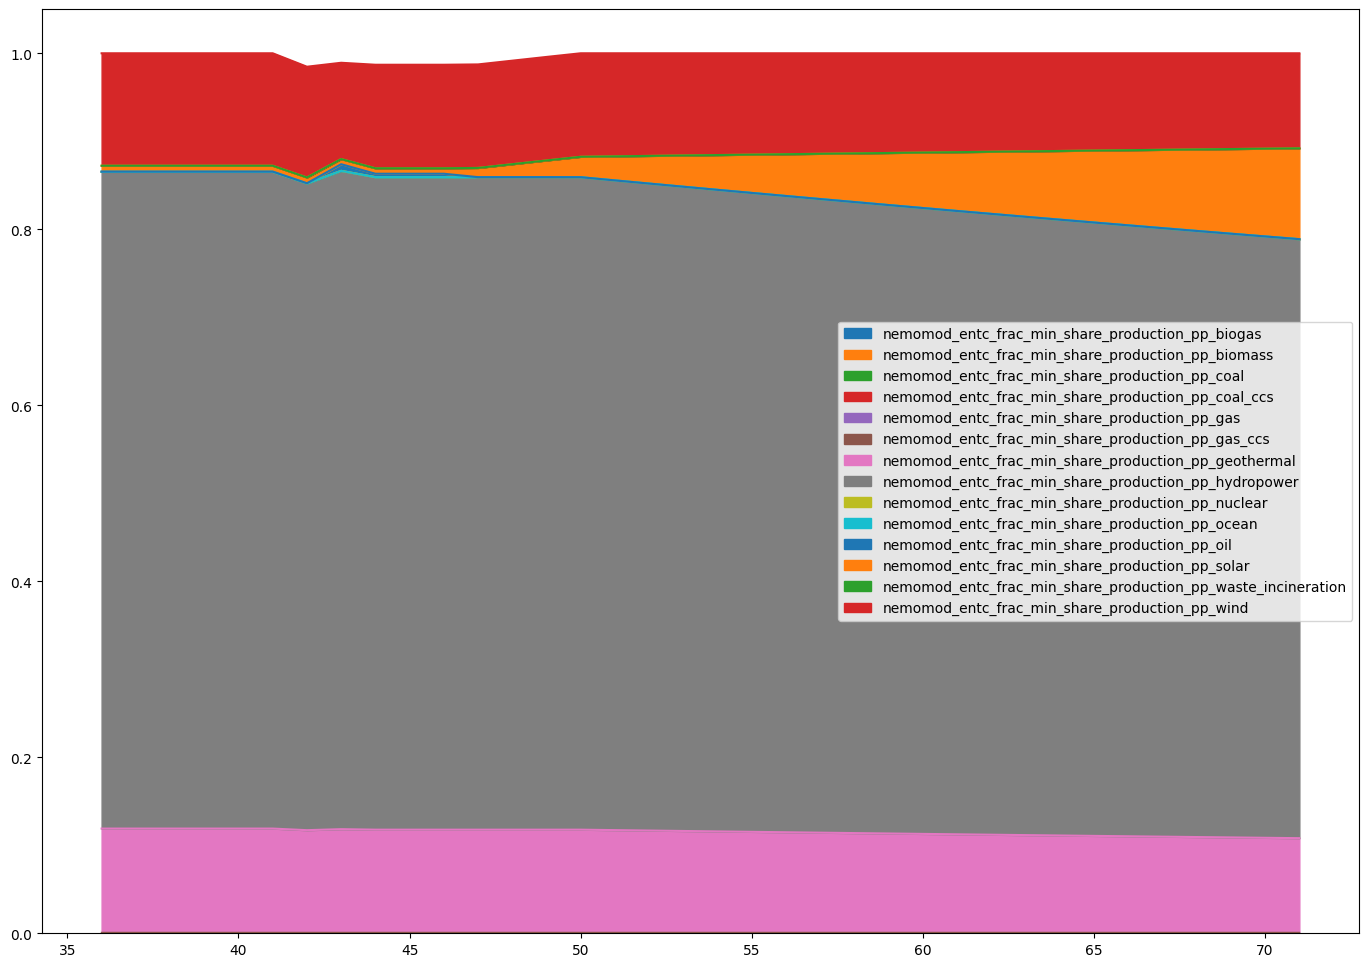

In [60]:
importlib.reload(tbe)
importlib.reload(dte)



# test the dict
dict_inputs = {}
for k, v in dict_config_te.items():
    dict_inputs.update({k: v})
dict_new = {"pp_solar": 0.15, "pp_geothermal": 0.1, "pp_wind": 0.15}
dict_inputs["dict_entc_renewable_target_msp"].update(dict_new)



region = "mexico"
te = dte.TransformationsEnergy(
    sa.model_attributes,
    dict_config_te,
    sa.dir_jl,
    sa.dir_ref_nemo,
    df_input[df_input[field_region].isin([region])],
    field_region = field_region,
)

df_in = df_input[df_input[field_region].isin(["mexico", "argentina", "honduras"])].reset_index(drop = True)
df_test = te.transformation_en_baseline(df_in)#, scale_non_renewables_to_match_surplus_msp = False)


fields_msp = [x for x in df_test.columns if ("min_share" in x) and ("hydrogen" not in x)]

fig, ax = plt.subplots(figsize = (17, 12))
df_test[df_test[field_region].isin(["honduras"])][fields_msp].plot.area(ax = ax)
#te.transformation_entc_renewables_target()/

<AxesSubplot: >

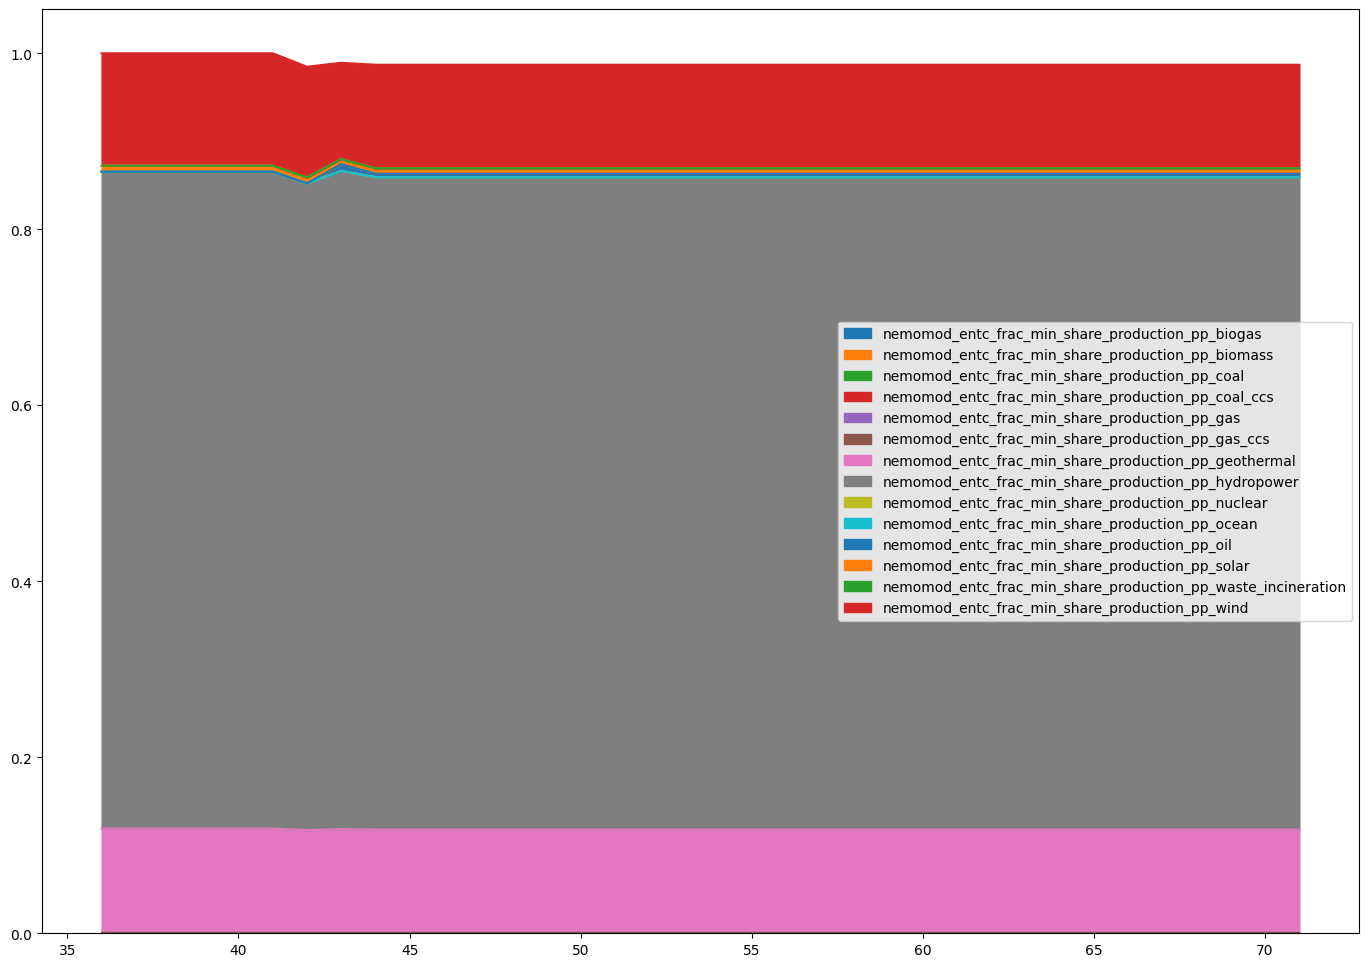

In [62]:
fig, ax = plt.subplots(figsize = (17, 12))
df_in[df_in[field_region].isin(["honduras"])][fields_msp].plot.area(ax = ax)

<AxesSubplot: >

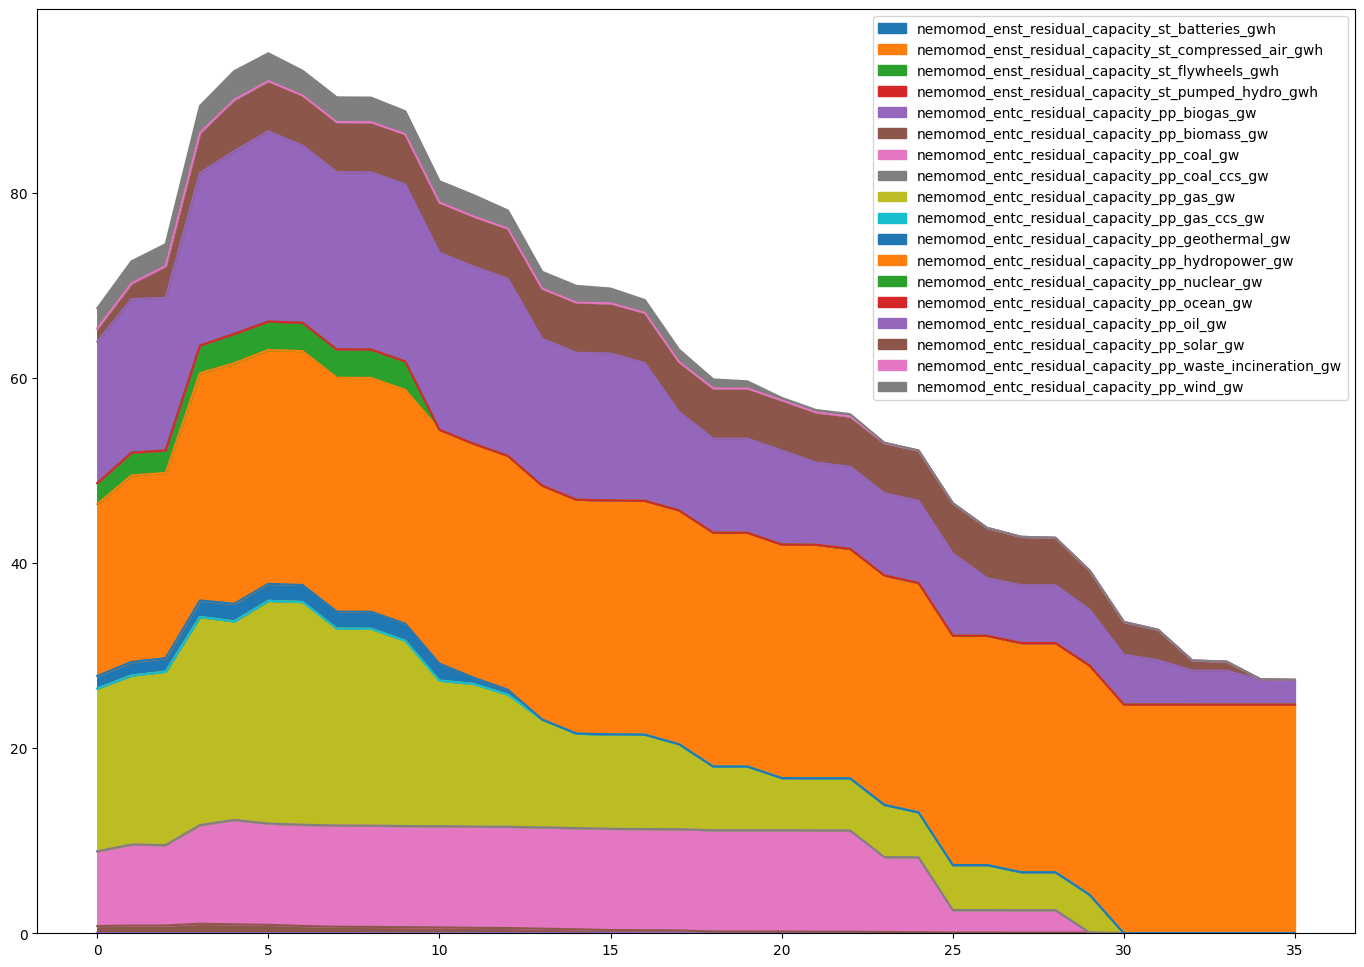

In [213]:
fields_rc = [x for x in df_test.columns if ("residual_capacity" in x)]

fig, ax = plt.subplots(figsize = (17, 12))
df_test[fields_rc].plot.area(ax = ax)
#te.transformation_entc_renewables_target()

# Run experiment (October 7 2023)
- response to reviewers
- Edmundo identified 5 primary ids from this set: `sisepuede_run_2023-10-06T20:10:09.932282`
- read these in, generate inputs, and map to templates


In [49]:
# read in data frame
fp_primaries_to_strategies = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/experiments_and_analysis/sisepuede_run_2023-10-06T20;10;09.932282/primary_ids_from_experiment_as_strategies;selection_for_uncertainty.csv"
df_primaries_to_strategies = pd.read_csv(fp_primaries_to_strategies)


# next, map primaries to new stratgy ids
primaries = sorted(list(df_primaries_to_strategies[sisepuede.key_primary]))
dict_primaries_to_strategies = dict((x, 5011 + i) for i, x in enumerate(primaries))



lhs_l, lhs_x, base_future_q = get_lhs_trajes(dict_filt)


df_in_base = ftc.generate_future_from_lhs_vector(
    None, 
    df_row_lhc_sample_l = 1.0, 
    future_id = 0, 
    baseline_future_q = True
)



{514914: 5011, 514926: 5012, 514978: 5013, 515112: 5014, 515483: 5015}